# Соберём все результаты

In [1]:
import numpy as np
import os
from IPython.display import Image
from scipy import stats
%pylab
%matplotlib inline
%run ./load_notebook.py

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


In [2]:
import functions

importing Jupyter notebook from functions.ipynb
Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


In [3]:
Distance = 9.3 # Mpc
incl = 62.
cosi = np.cos(incl / 180. * np.pi)
sini = np.sin(incl / 180. * np.pi)

In [4]:
sigma_s = np.load('./data/sigma_s.npy')
Sigma_H2 = np.load('./data/Sigma_H2.npy')
sigma_HI = np.load('./data/sigma_HI.npy')
Sigma_HI = np.load('./data/Sigma_HI.npy')
Sigma_s = np.load('./data/Sigma_s.npy')
sig_R_max = np.load('./data/sig_R_max.npy')
sig_R_min = np.load('./data/sig_R_min.npy')
r_HI = np.load('./data/r_HI.npy')
vel_HI = np.load('./data/vel_HI.npy')
velocity_HI = np.load('./data/velocity_HI.npy')
kappa = np.load('./data/kappa.npy')
dist_kpc = np.load('./data/dist_kpc_corr.npy')
sig_R_min_err = np.load('./data/sig_R_min_err.npy')
sig_R_max_err = np.load('./data/sig_R_max_err.npy')
sigma_s_err = np.load('./data/sigma_s_err.npy')
H_alpha = np.load('./data/H_alpha.npy')
Z = np.load('./data/Z.npy')

### Возникла небольшая проблема


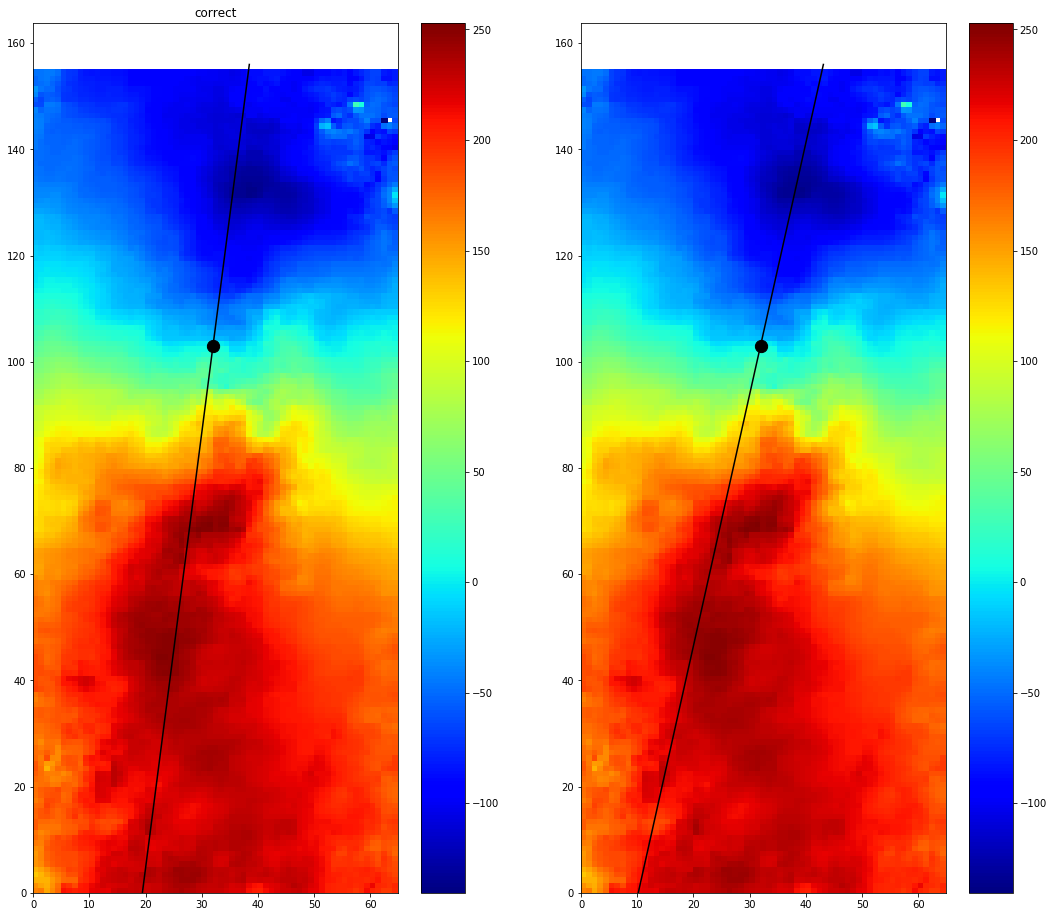

In [5]:
X,Y = np.meshgrid(np.arange(0.,len(velocity_HI[0]),1), np.arange(0.,len(velocity_HI),1))
plt.figure(figsize=[18,16])
plt.subplot(1,2,1)
quadmesh = plt.pcolormesh(X, Y, velocity_HI, cmap='jet')
plt.colorbar()
plt.scatter(32.0778305 ,103.00132757,[150.], color='black' )
plt.plot([19.43,19.43 + 155. * np.tan(7.*np.pi/180)], [0., 156], color='black')
plt.title('correct')

plt.subplot(1,2,2)
quadmesh = plt.pcolormesh(X, Y, velocity_HI, cmap='jet')
plt.colorbar()
plt.scatter(32.0778305 ,103.00132757,[150.], color='black' )
plt.plot([10.18,10.18 + 155. * np.tan(12.*np.pi/180)], [0., 156], color='black')

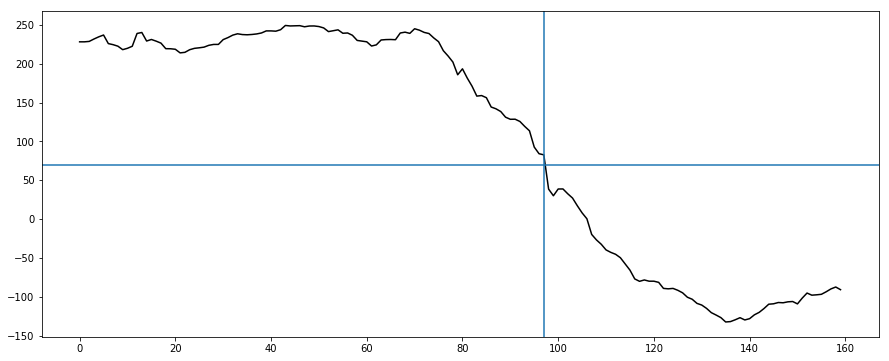

In [61]:
x0, y0 = 19.43, 0.  
x1, y1 = 19.43 + 155. * np.tan(7.*np.pi/180.),155.
num = 160
x, y = np.linspace(x0, x1, num), np.linspace(y0, y1, num)
zi_cub = velocity_HI[y.astype(np.int), x.astype(np.int)]

fig = plt.figure(figsize = [15, 6])
line = plot(zi_cub,'black')
plt.axhline(y=70)
plt.axvline(x = 97)



In [62]:
#Определим длину нашего среза
r_vel = np.sqrt(155.**2 + (155. * np.tan(7.*np.pi/180))**2)
#Переведём в arcsec
r_vel = r_vel * 1.9
#Найдём центр галактики на срезе
c_r_vel = 103. / math.cos(7.*np.pi/180.)
c_r_vel = c_r_vel * 1.9

zi_cub[97]


82.77197

In [63]:
r = np.zeros(160)
r = np.arange(160)
new_center = 97
v_at_new_center = 65.
old_center = 106

step = (c_r_vel)/97.
print(c_r_vel)
r_HI = np.zeros(160)
vel_HI = np.zeros(160)
r_HI_ = np.abs([d-new_center for d in r]) 
vel_HI = np.abs([zi_cub[i]- v_at_new_center if i<old_center else -v_at_new_center-abs(zi_cub[i]) for i in range(160)])
r_HI = r_HI_ * step * np.pi / (180 *3600) * Distance * 10**3 
print(len(r_HI), len(vel_HI))



197.16967284229662
160 160


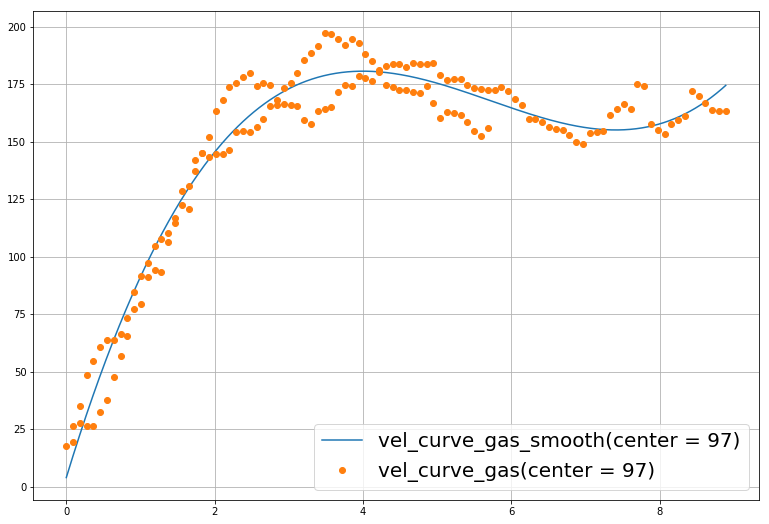

In [64]:

points1 = np.linspace(min(r_HI), max(r_HI), 1000)
velocity_approx1 = poly1d(polyfit(r_HI, vel_HI, deg=4))

fig, ax = plt.subplots(figsize=[13,9])
line1 = ax.plot(points1, velocity_approx1(points1), label='vel_curve_gas_smooth(center = 97)')
line3 = ax.plot(r_HI,vel_HI,'o',label = 'vel_curve_gas(center = 97)')
plt.legend(loc='lower right',fontsize=20)
plt.grid()

Найдём такое минимальное dR, при котором с эпициклической частотой будет все хорошо.

0.33


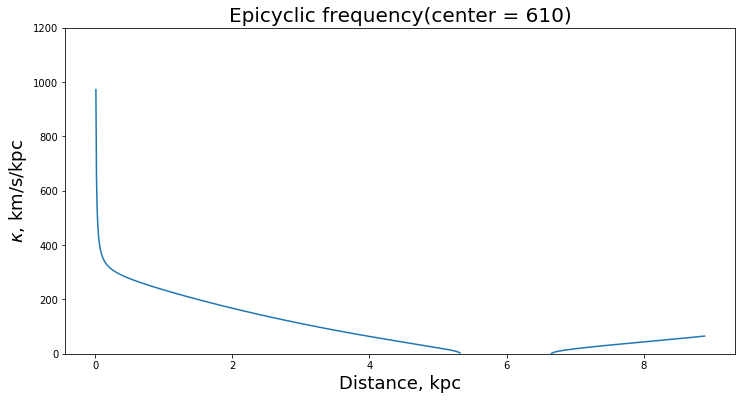

In [65]:
dR =0.33#(Distance*1000*2*np.pi)/(360*60*60.)
print(dR)
kappa1 = [functions.epic_freq(velocity_approx1, r, dR) for r in points1]

fig = plt.figure(figsize = [12,6])
plt.plot(points1, kappa1) 
plt.title('Epicyclic frequency(center = 610)',fontsize = 20)
plt.ylabel('$\kappa$, km/s/kpc', fontsize = 18)
plt.xlabel('Distance, kpc', fontsize = 18)
plt.ylim(0, 1200.)
plt.show()



In [66]:
v_2005 = np.load('./data/vel_Lang20.npy')
r_2005 = np.load('./data/r_Lang20.npy')
v_0810 = np.load('./data/vel_Walter20.npy')
r_0810 = np.load('./data/r_Walter20.npy')
v_1609 = np.load('./data/vel_Ponomareva20.npy')
r_1609 = np.load('./data/r_Ponomareva20.npy')

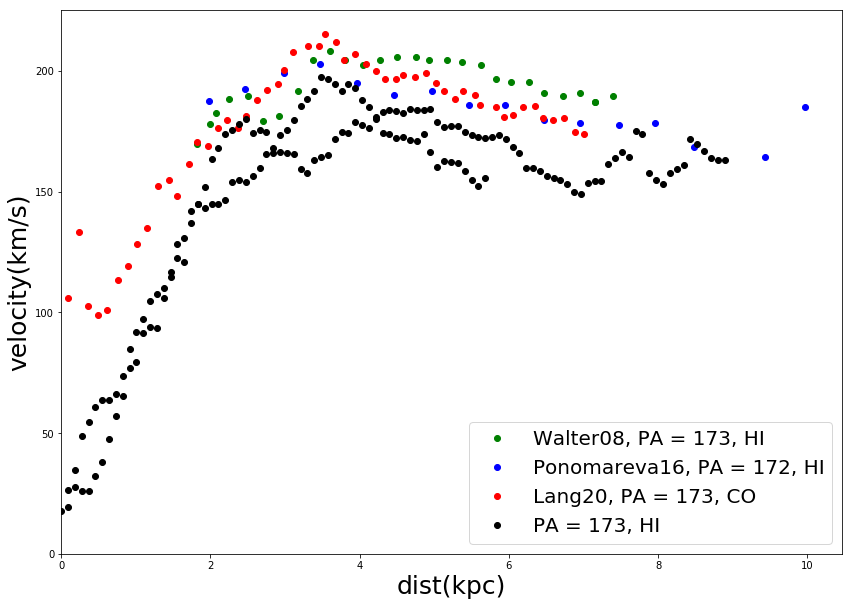

In [67]:
plt.figure(figsize=[14,10])
plt.plot(r_0810,v_0810 * np.sin(61.8*np.pi/180.),'o', color='green',label='Walter08, PA = 173, HI')
plt.plot(r_1609,v_1609 * np.sin(58. *np.pi/180.),'o', color='blue',label='Ponomareva16, PA = 172, HI')
plt.plot(r_2005,v_2005 * np.sin(57.3*np.pi/180.),'o', color='red',label='Lang20, PA = 173, CO')
plt.plot(r_HI,vel_HI,'o', color='black',label='PA = 173, HI')
plt.ylim(0,)
plt.xlim(0,)
plt.xlabel('dist(kpc)',fontsize=25)
plt.ylabel('velocity(km/s)',fontsize=25)
plt.legend(loc='lower right',fontsize=20)

Добавим к нашим скоростям точки из Walter

In [68]:
r_HI_Walter = np.zeros(188)
vel_HI_Walter = np.zeros(188)

r_HI_Walter[0:160] = r_HI
vel_HI_Walter[0:160] = vel_HI

r_HI_Walter[160:188] = r_0810
vel_HI_Walter[160:188] = v_0810 * np.sin(61.8*np.pi/180.)

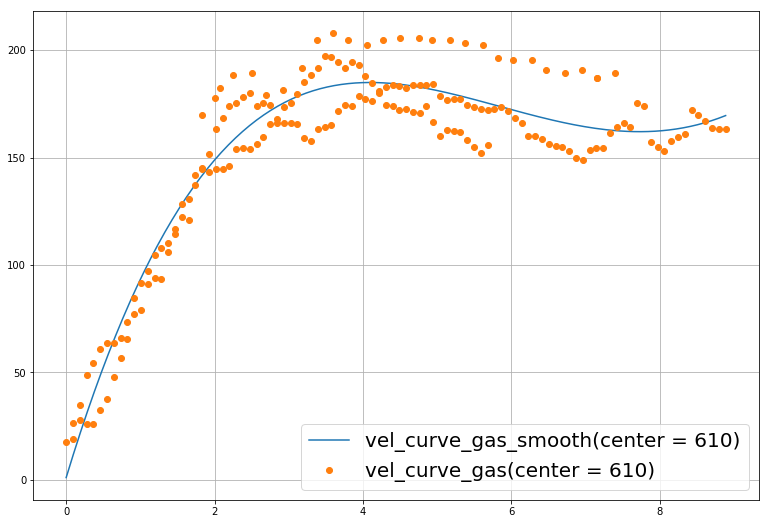

In [69]:
points_Walter = np.linspace(min(r_HI_Walter), max(r_HI_Walter), 188)
velocity_approx_Walter = poly1d(polyfit(r_HI_Walter, vel_HI_Walter, deg=4))

fig, ax = plt.subplots(figsize=[13,9])
line1 = ax.plot(points_Walter, velocity_approx_Walter(points_Walter), label='vel_curve_gas_smooth(center = 610)')
line3 = ax.plot(r_HI_Walter,vel_HI_Walter,'o',label = 'vel_curve_gas(center = 610)')
plt.legend(loc='lower right',fontsize=20)
plt.grid()

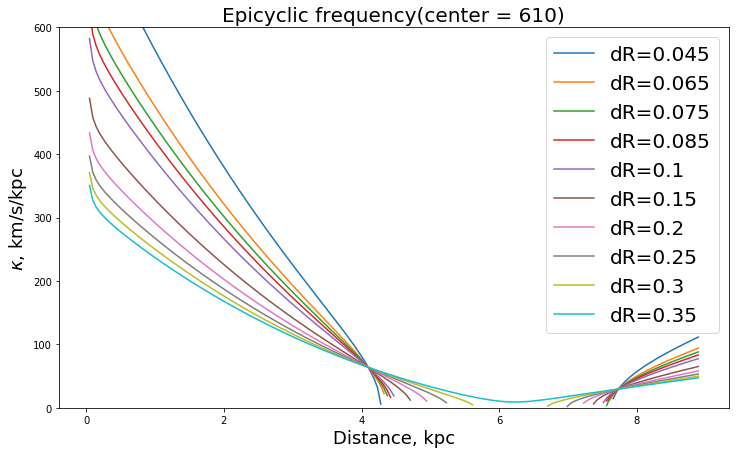

In [70]:
dR = [0.045,0.065,0.075,0.085,0.1,0.15,0.2,0.25,0.3,0.35] 
kappa_Walter = np.zeros((len(points_Walter),len(dR)))

kappa_Walter = [[functions.epic_freq(velocity_approx_Walter, r, dr) for r in points_Walter] for dr in dR]

fig = plt.figure(figsize = [12,7])
for i in range(10):
    plt.plot(points_Walter, kappa_Walter[:][i], label='dR='+str(dR[i])) 
plt.title('Epicyclic frequency(center = 610)',fontsize = 20)
plt.ylabel('$\kappa$, km/s/kpc', fontsize = 18)
plt.xlabel('Distance, kpc', fontsize = 18)
plt.ylim(0, 600.)
plt.legend(fontsize=20)
plt.show()


Попробуем исправить эпицикл с помощью добавления точек

In [71]:
r_HI_add = np.zeros(220)
vel_HI_add = np.zeros(220)

k = (np.max(r_HI)-np.min(r_HI))/610.

r_HI_add[60:220] = r_HI
r_HI_add[0:60] = [np.max(r_HI)+i*k for i in range(60)]
vel_HI_add[60:220] = vel_HI
vel_HI_add[0:60] = vel_HI[0]


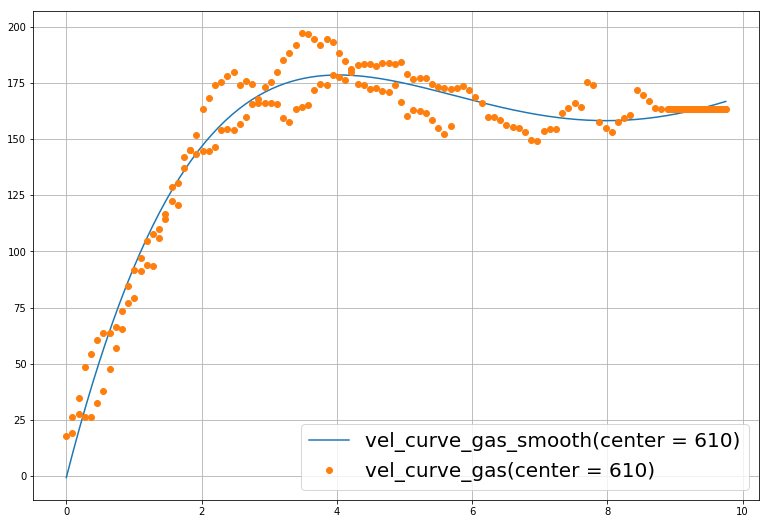

In [72]:
points2 = np.linspace(min(r_HI_add), max(r_HI_add), 200)
velocity_approx2 = poly1d(polyfit(r_HI_add, vel_HI_add, deg=4))

fig, ax = plt.subplots(figsize=[13,9])
line1 = ax.plot(points2, velocity_approx2(points2), label='vel_curve_gas_smooth(center = 610)')
line3 = ax.plot(r_HI_add,vel_HI_add,'o',label = 'vel_curve_gas(center = 610)')
plt.legend(loc='lower right',fontsize=20)
plt.grid()

0.28


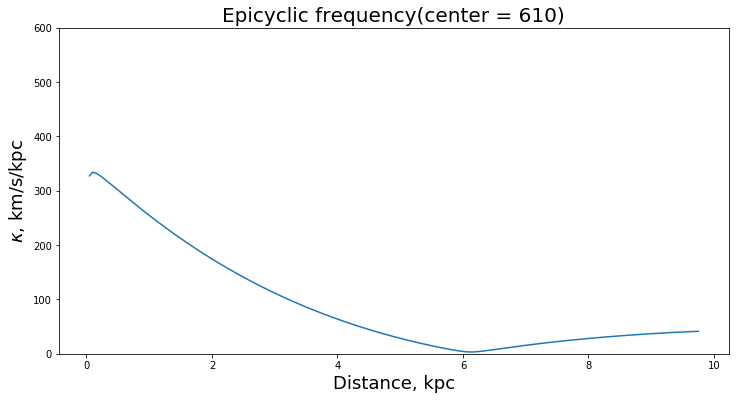

In [77]:
dR =0.28#(Distance*1000*2*np.pi)/(360*60*60.)
print(dR)
kappa1 = [functions.epic_freq(velocity_approx2, r, dR) for r in points2]

fig = plt.figure(figsize = [12,6])
plt.plot(points2, kappa1) 
plt.title('Epicyclic frequency(center = 610)',fontsize = 20)
plt.ylabel('$\kappa$, km/s/kpc', fontsize = 18)
plt.xlabel('Distance, kpc', fontsize = 18)
plt.ylim(0, 600.)
plt.show()

In [63]:
np.save('./data/r_HI.npy',r_HI_add)
np.save('./data/vel_HI.npy',vel_HI_add)

# 1. Параметр Тумре

In [65]:
velocity_approx = poly1d(polyfit(r_HI, vel_HI, deg=4))

In [66]:
dR =0.23#(Distance*1000*2*np.pi)/(360*60*2.)
G = 4.32
Qeff_max = np.zeros(dist_kpc.shape)
Qeff_min = np.zeros(dist_kpc.shape)
bark = np.zeros(dist_kpc.shape)
bark_max = np.zeros(dist_kpc.shape)
Qg = np.zeros(dist_kpc.shape)
Qs_min = np.zeros(dist_kpc.shape)
Qs_max = np.zeros(dist_kpc.shape)
Sigma_g = np.zeros(dist_kpc.shape)

step = 0
errors = 0
for i, row in enumerate(dist_kpc):
    for j, col in enumerate(dist_kpc[0]):
        step+=1
        if step % 1000 == 0:
            print(step)
        c = sigma_HI[i][j]/1000.
        Sigma_g[i][j] = 1.36*(Sigma_HI[i][j] + Sigma_H2[i][j])
        kappa = functions.epic_freq(velocity_approx, dist_kpc[i][j], dR)
        Sigma_s_ = Sigma_s[i][j]
        s_R_max = sig_R_max[i][j]
        s_R_min = sig_R_min[i][j]
        Qg[i][j] = kappa * c / (math.pi * G * Sigma_g[i][j])
        Qs_max[i][j] = kappa * s_R_max / (3.36 * G * Sigma_s_)
        Qs_min[i][j] = kappa * s_R_min / (3.36 * G * Sigma_s_)
        
       
        try:
            root_for_max, qeff = functions.FindMaxQeffKinem(rangek=np.arange(0.01, 50., 1.), Qs=Qs_min[i][j], Qg=Qg[i][j], s=c/s_R_min)
        except ValueError:
            errors+=1
            qeff = 0.01
            root_for_max = -1.
        Qeff_min[i][j] = 1./qeff
        bark[i][j] = root_for_max
        
        try:
            root_for_max, qeff = functions.FindMaxQeffKinem(rangek=np.arange(0.01, 50., 1.), Qs=Qs_max[i][j], Qg=Qg[i][j], s=c/s_R_min)
        except ValueError:
            errors+=1
            qeff = 0.01
            root_for_max = -1.
        Qeff_max[i][j] = 1./qeff
        bark_max[i][j] = root_for_max
        
print('Errors:{}'.format(errors))

1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
Errors:4704


Text(0.5, 1.0, '$Q_{gas}$')

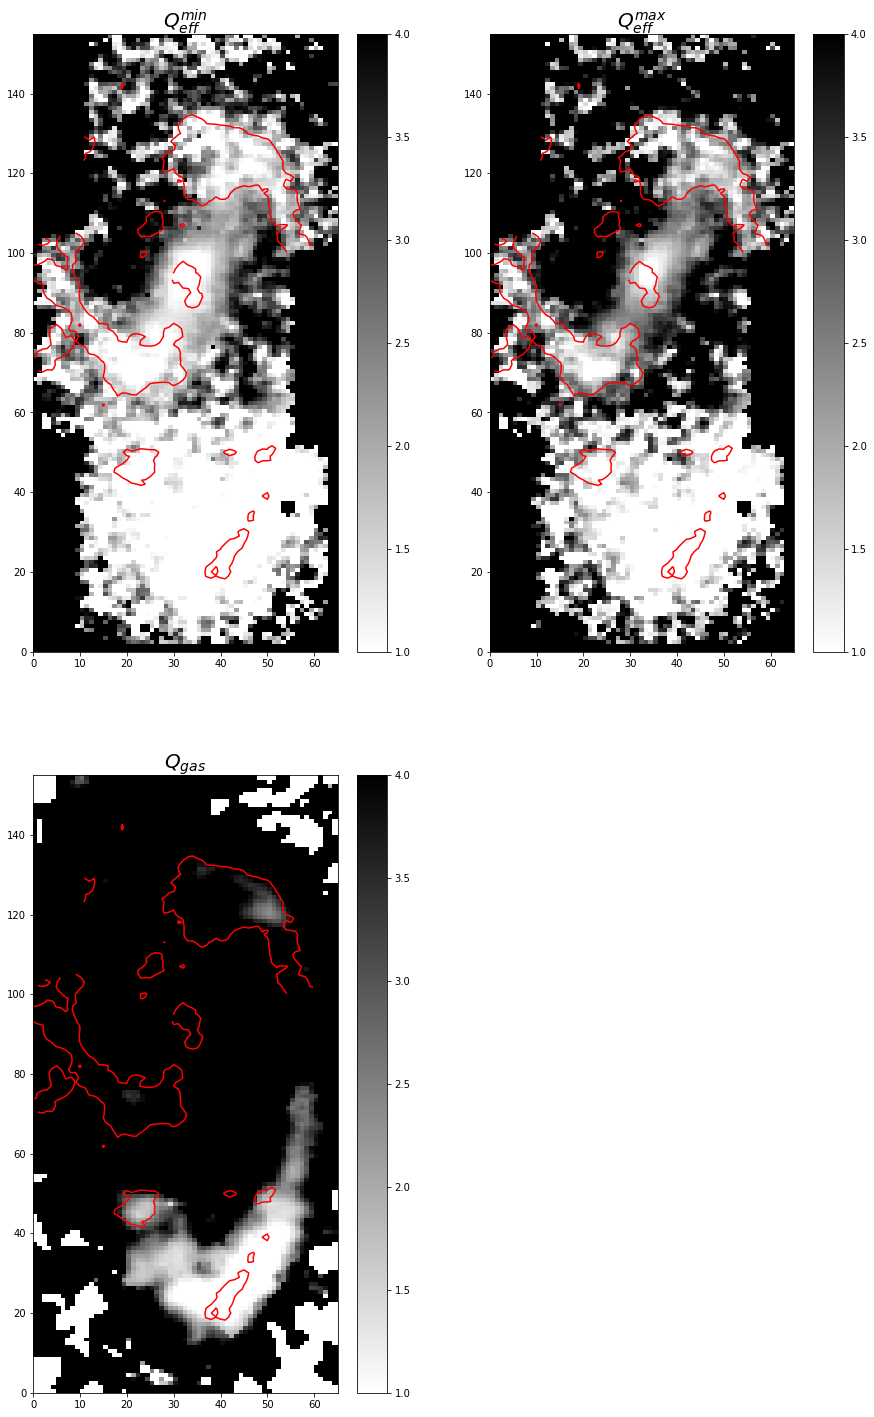

In [67]:
Sigma_SFR = np.load('./data/Sigma_SFR.npy')
X,Y = np.meshgrid(np.arange(0.,66,1), np.arange(0.,156,1))
plt.figure(figsize=[15, 25])
plt.subplot(2,2,1)
CS = plt.contour(X, Y, Sigma_SFR, levels=[0.045,], aspect='auto', alpha=1, colors='red')
quadmesh = plt.pcolormesh(X, Y, Qeff_min, cmap='gist_yarg')
quadmesh.set_clim(vmin=1., vmax=4.)
plt.colorbar()
plt.title(r'$Q_{eff}^{min}$', fontsize=20)

plt.subplot(2,2,2)
CS = plt.contour(X, Y, Sigma_SFR, levels=[0.045,], aspect='auto', alpha=1, colors='red')
quadmesh = plt.pcolormesh(X, Y, Qeff_max, cmap='gist_yarg')
quadmesh.set_clim(vmin=1., vmax=4.)
quadmesh.cmap.set_under('white')
plt.colorbar()
plt.title(r'$Q_{eff}^{max}$', fontsize=20)

plt.subplot(2,2,3)
CS = plt.contour(X, Y, Sigma_SFR, levels=[0.045,], aspect='auto', alpha=1, colors='red')
quadmesh = plt.pcolormesh(X, Y, Qg, cmap='gist_yarg')
quadmesh.set_clim(vmin=1., vmax=4.)
quadmesh.cmap.set_under('white')
plt.colorbar()
plt.title(r'$Q_{gas}$', fontsize=20)

In [68]:
Inst_field1 = np.zeros(dist_kpc.shape)

for i, row in enumerate(dist_kpc):
    for j, col in enumerate(dist_kpc[0]):
        if(Qeff_min[i][j] <= 3.):
            Inst_field1[i][j] = 1
        else: 
            Inst_field1[i][j] = 0
            
Inst_field3 = np.zeros(dist_kpc.shape)

for i, row in enumerate(dist_kpc):
    for j, col in enumerate(dist_kpc[0]):
        if(Qeff_max[i][j] <= 3.):
            Inst_field3[i][j] = 1
        else: 
            Inst_field3[i][j] = 0            
            
        

Text(0.5, 1.0, '$Q_{eff}^{max}$')

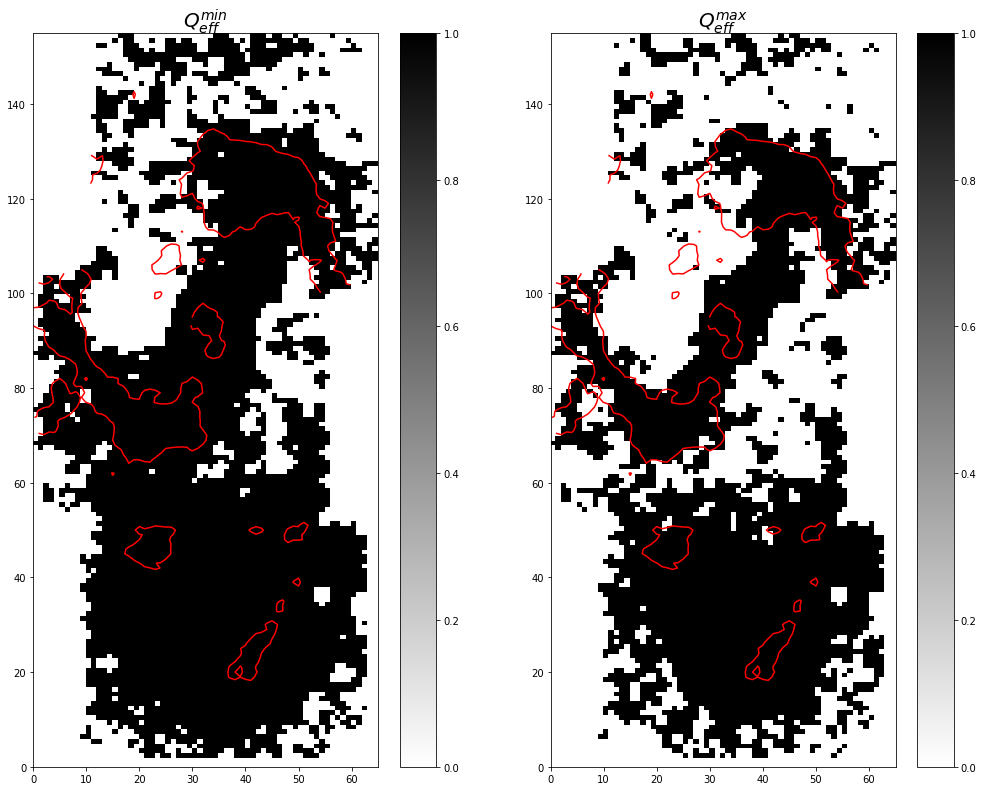

In [69]:
X,Y = np.meshgrid(np.arange(0.,66,1), np.arange(0.,156,1))
plt.figure(figsize=[17, 13.5])
plt.subplot(1,2,1)
CS = plt.contour(X, Y, Sigma_SFR, levels=[0.045,], aspect='auto', alpha=1, colors='red')
quadmesh = plt.pcolormesh(X, Y, Inst_field1, cmap='gist_yarg')
plt.colorbar()
plt.title(r'$Q_{eff}^{min}$', fontsize=20)

plt.subplot(1,2,2)
CS = plt.contour(X, Y, Sigma_SFR, levels=[0.045,], aspect='auto', alpha=1, colors='red')
quadmesh = plt.pcolormesh(X, Y, Inst_field3, cmap='gist_yarg')
plt.colorbar()
plt.title(r'$Q_{eff}^{max}$', fontsize=20)


Ошибки дисперсии скоростей звезд. Относительная ошибка.

In [70]:
relative_error_min = np.zeros(sigma_s_err.shape)
relative_error_max = np.zeros(sigma_s_err.shape)

relative_error_max = sig_R_max_err / sig_R_max
relative_error_min = sig_R_min_err / sig_R_min

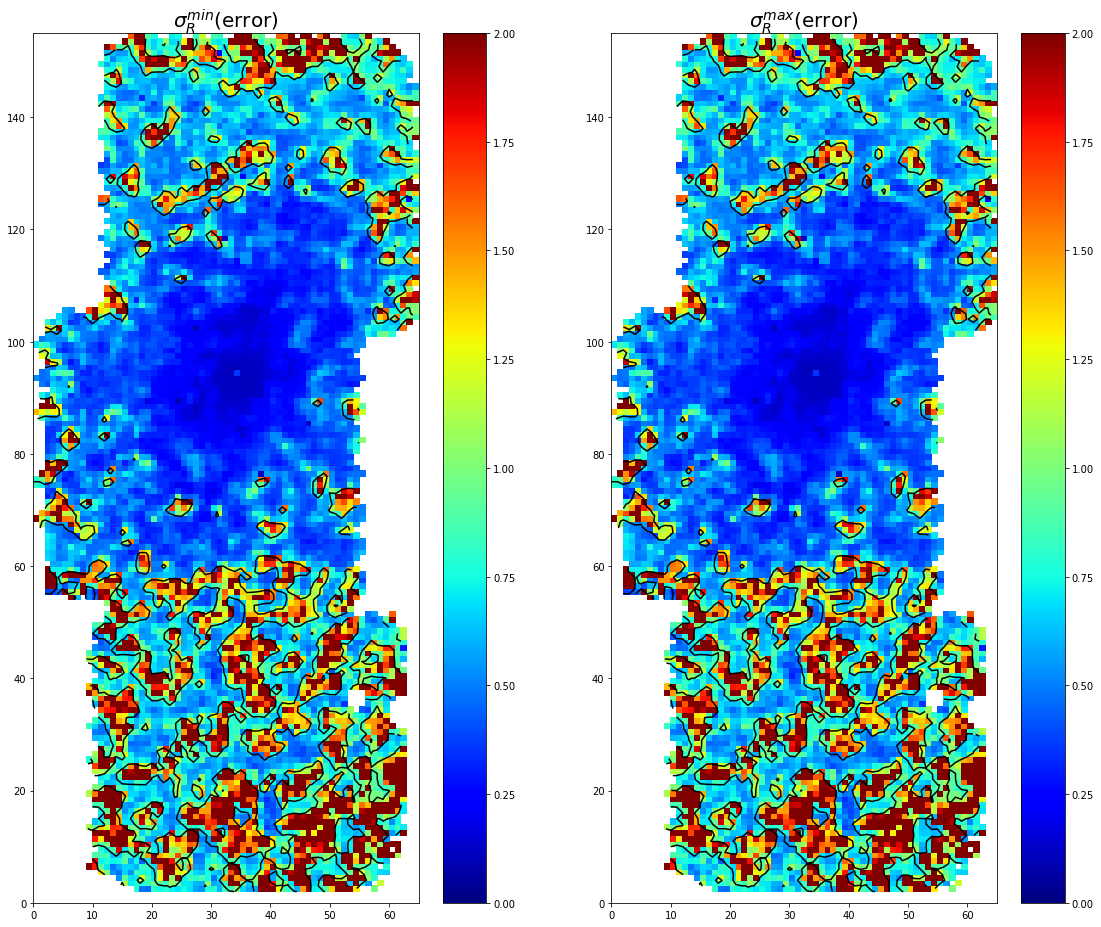

In [71]:
plt.figure(figsize=[19, 16])
plt.subplot(1,2,1)
CS = plt.contour(X, Y, relative_error_min, levels=[1,], aspect='auto', alpha=1, colors='black')
quadmesh = plt.pcolormesh(X, Y, relative_error_min, cmap=cm.jet)
quadmesh.set_clim(vmin=0.0, vmax=2.)
plt.colorbar()
plt.title(r'$\sigma_R^{min}$(error)', fontsize=20)

plt.subplot(1,2,2)
CS = plt.contour(X, Y, relative_error_max, levels=[1,], aspect='auto', alpha=1, colors='black')
quadmesh = plt.pcolormesh(X, Y, relative_error_max, cmap=cm.jet)
quadmesh.set_clim(vmin=0.0, vmax=2.)
plt.colorbar()
plt.title(r'$\sigma_R^{max}$(error)',fontsize=20)
plt.show()

Text(0.5, 1.0, '$Q_{eff}^{max}$')

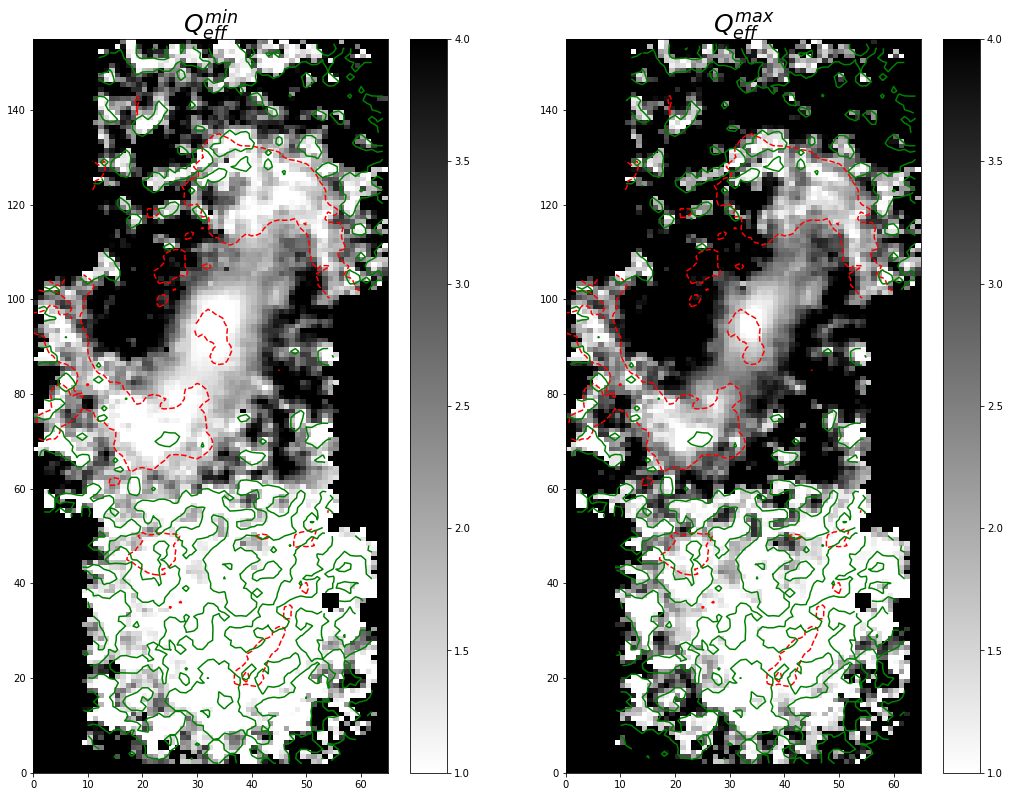

In [72]:
X,Y = np.meshgrid(np.arange(0.,66,1), np.arange(0.,156,1))
plt.figure(figsize=[17.5, 13.5])
plt.subplot(1,2,1)
CS = plt.contour(X, Y, np.log10(H_alpha), levels=[-14.2,-12], aspect='auto', alpha=1, colors='red')
CS = plt.contour(X, Y, relative_error_min, levels=[1,], aspect='auto', alpha=1, colors='green')
quadmesh = plt.pcolormesh(X, Y, Qeff_min, cmap='gist_yarg')
quadmesh.set_clim(vmin=1., vmax=4.)
plt.colorbar()
plt.title(r'$Q_{eff}^{min}$', fontsize=25)

plt.subplot(1,2,2)
CS = plt.contour(X, Y, np.log10(H_alpha), levels=[-14.2,-12], aspect='auto', alpha=1, colors='red')
CS = plt.contour(X, Y, relative_error_max, levels=[1,], aspect='auto', alpha=1, colors='green')
quadmesh = plt.pcolormesh(X, Y, Qeff_max, cmap='gist_yarg')
quadmesh.set_clim(vmin=1., vmax=4.)
quadmesh.cmap.set_under('white')
plt.colorbar()
plt.title(r'$Q_{eff}^{max}$', fontsize=25)

## Азимутальное усреднение. Сравнение с Leroy.

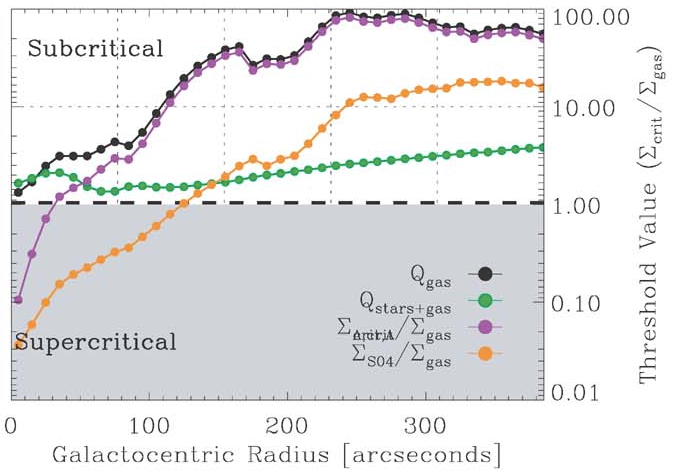

In [27]:
Image('./images/instability.png')

In [40]:
def azimuthal_average(Q, step=None, vmax=None, maxval=None, vmin=0.5):
    az_av = []
    az_dev = []
    anulli = []
    for dbin in np.arange(vmin,vmax,step):
        mask = (dist_kpc >= dbin) & (dist_kpc <= dbin + step)
        anulli = Q[mask]
        mask = (anulli < maxval) & (anulli > 0.) 
        anulli = anulli[mask]
        az_av.append(anulli.sum()/mask.sum())
        az_dev.append(np.std(anulli))
    return az_av, az_dev

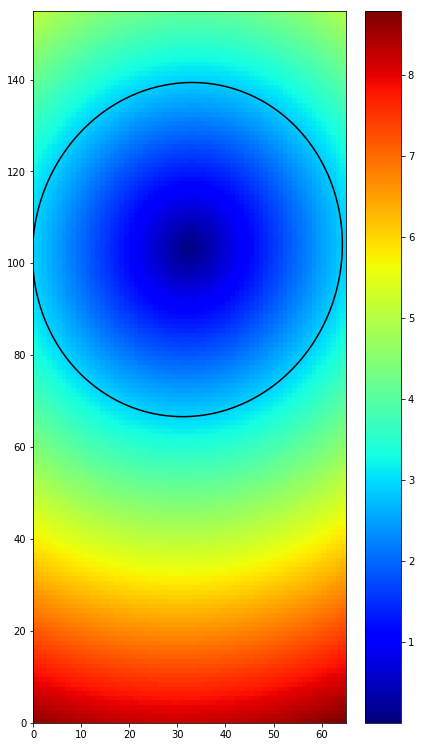

In [43]:
plt.figure(figsize=[7.,13.1])
X,Y = np.meshgrid(np.arange(0.,66,1), np.arange(0.,156,1))
CS = plt.contour(X, Y, dist_kpc, levels=[0.,2.9], aspect='auto', alpha=1, colors='black')
quadmesh = plt.pcolormesh(X, Y, dist_kpc, cmap='jet')
plt.colorbar()
#2.55 -масимальный радиус усреднения на кругу

In [30]:
Sigma_s = np.load('./data/Sigma_s.npy')
Sigma_H2_az = azimuthal_average(Sigma_H2, step=0.25, vmax=10., maxval = 140.)[0]
sigma_HI_az = azimuthal_average(sigma_HI/1000., step=0.25, vmax=10., maxval = 100.)[0]
Sigma_HI_az = azimuthal_average(Sigma_HI, step=0.25, vmax=10., maxval = 7.)[0]
Sigma_s_az = azimuthal_average(Sigma_s, step=0.25, vmax=10., maxval = 4000.)[0]
sig_R_max_az = azimuthal_average(sig_R_max, step=0.25, vmax=10., maxval = 300.)[0]
sig_R_min_az = azimuthal_average(sig_R_min, step=0.25, vmax=10., maxval = 300.)[0]
dist_az = np.array(np.arange(0.5,10.,0.25))

/home/lera/.local/lib/python3.5/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
/home/lera/.local/lib/python3.5/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/lera/.local/lib/python3.5/site-packages/numpy/core/_methods.py:110: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/home/lera/.local/lib/python3.5/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
/home/lera/.local/lib/python3.5/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in less
  
/home/lera/.local/lib/python3.5/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in greater
  
/home/lera/.local/lib/python3.5/site-packages/ipykernel_lau

In [31]:
dR =(Distance*1000*2*np.pi)/(360*60*60.)
G = 4.32

Qeff_max_az = np.zeros(dist_az.shape)
Qeff_min_az = np.zeros(dist_az.shape)
Qg_az = np.zeros(dist_az.shape)
Qs_max_az = np.zeros(dist_az.shape)
Qs_min_az = np.zeros(dist_az.shape)
error = 0
step = 0
for i, ddd in enumerate(np.arange(0.5, 10., 0.25)):
    step+=1
    c = sigma_HI_az[i]
    Sigma_g = 1.36*(Sigma_HI_az[i]+ Sigma_H2_az[i])
    kappa = functions.epic_freq(velocity_approx, ddd, dR)
    Sigma_s = Sigma_s_az[i]
    s_R_max = sig_R_max_az[i]
    s_R_min = sig_R_min_az[i]
    Qg_az[i] = kappa * c / (math.pi * G * Sigma_g)
    Qs_max_az[i] = kappa * s_R_max / (3.36 * G * Sigma_s)
    Qs_min_az[i] = kappa * s_R_min / (3.36 * G * Sigma_s)
        
    try:   
        root, qeff = functions.FindMaxQeffKinem(rangek=np.arange(0.01, 50., 1.), Qs=Qs_min_az[i], Qg=Qg_az[i], s=c/s_R_min)
    except:
        error+=1
        qeff = 0.01
    Qeff_min_az[i] = 1./qeff
    
    try: 
        root,qeff = functions.FindMaxQeffKinem(rangek=np.arange(0.01, 50., 1.), Qs=Qs_max_az[i], Qg=Qg_az[i], s=c/s_R_min)
    except:
        error+=1
        qeff = 0.01
    Qeff_max_az[i] = 1./qeff
print(error)  

4


(0, 40.0)

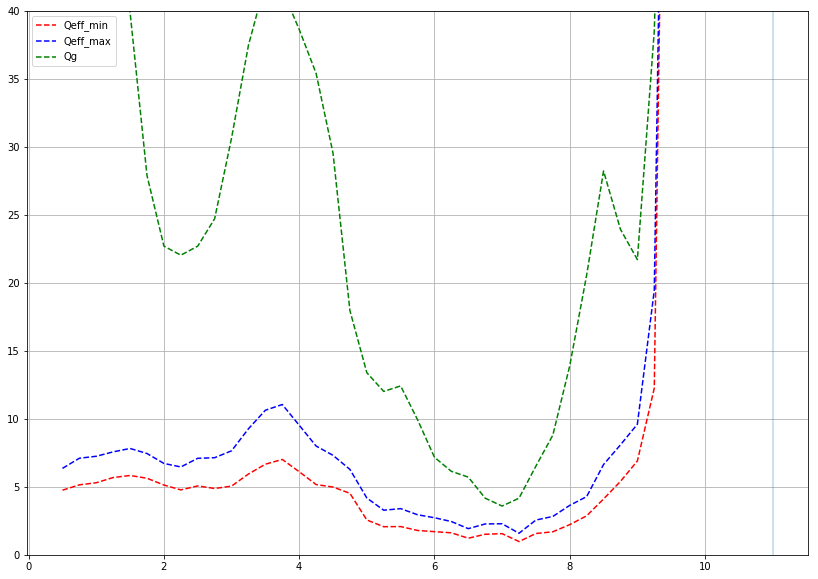

In [32]:
plt.figure(figsize=[14,10])
plt.plot(np.array(np.arange(0.5,10.,0.25)),Qeff_min_az, '--', label='Qeff_min', color='red')


plt.plot(np.array(np.arange(0.5,10.,0.25)),Qeff_max_az, '--', label='Qeff_max', color='blue')

plt.plot(np.array(np.arange(0.5,10.,0.25)),Qg_az, '--', label='Qg', color='green')
 


plt.grid()
plt.legend()
plt.axvline(x=11., alpha=0.3)
plt.ylim(0, 40.)

to do: нужно нормально оцифровать данные Леруа

# 2. Shear

$$ \Sigma_{gas} > \frac{2.5 A \sigma_{g}}{\pi G}$$

$A = 0.5 ( \dfrac{v(r_{gal})}{r_{gal}} - \dfrac{dv(r_{gal})}{dr_{gal}} ) $


In [73]:
G = 4.32
dR =0.2#(Distance*1000*2*np.pi)/(360*60*60.)
Sigma_crit = np.zeros(dist_kpc.shape)
for i, row in enumerate(dist_kpc):
    for j, col in enumerate(dist_kpc[0]):
 
        A = 0.5 * (velocity_approx(dist_kpc[i][j]) / dist_kpc[i][j] - velocity_approx.deriv()(dist_kpc[i][j]))  
        sigma_g = sigma_HI[i][j]/1000.
  
        Sigma_crit[i][j] = 0.8 * A * sigma_g / np.pi / G

In [74]:
Inst_field = np.zeros(dist_kpc.shape)

for i, row in enumerate(dist_kpc):
    for j, col in enumerate(dist_kpc[0]):
        Sigma_gas = 1.36*(Sigma_HI[i][j] + Sigma_H2[i][j])
        if(Sigma_gas > Sigma_crit[i][j]):
            Inst_field[i][j] = 1
        else: 
            Inst_field[i][j] = 0

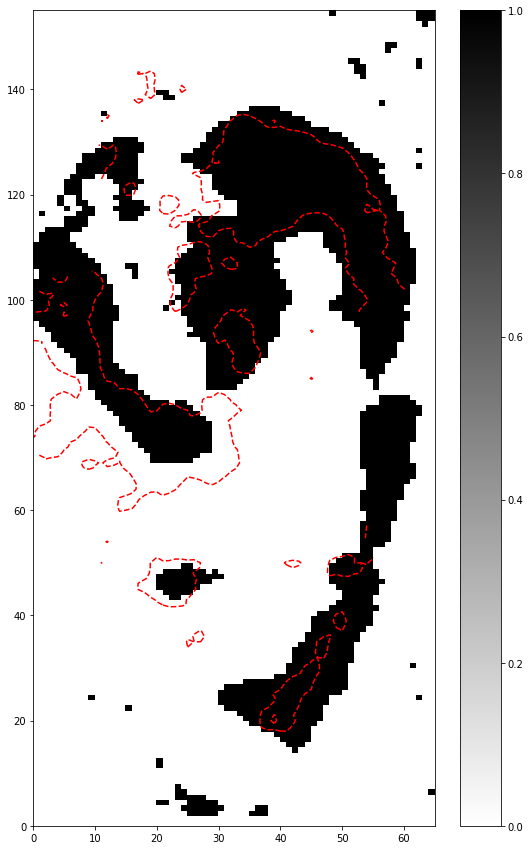

In [75]:
X,Y = np.meshgrid(np.arange(0.,66,1), np.arange(0.,156,1))
fig = plt.figure(figsize=[9,15])
CS = plt.contour(X, Y, np.log10(H_alpha), levels=[-14.3,-12], aspect='auto', alpha=1, colors='red')
quadmesh = plt.pcolormesh(X, Y, Inst_field, cmap='gist_yarg')
plt.colorbar()

In [76]:
shear_method = np.zeros(dist_kpc.shape)

for i, row in enumerate(dist_kpc):
    for j, col in enumerate(dist_kpc[0]):
        Sigma_gas = 1.36*(Sigma_HI[i][j] + Sigma_H2[i][j])
        shear_method[i][j] = Sigma_crit[i][j] / Sigma_gas 

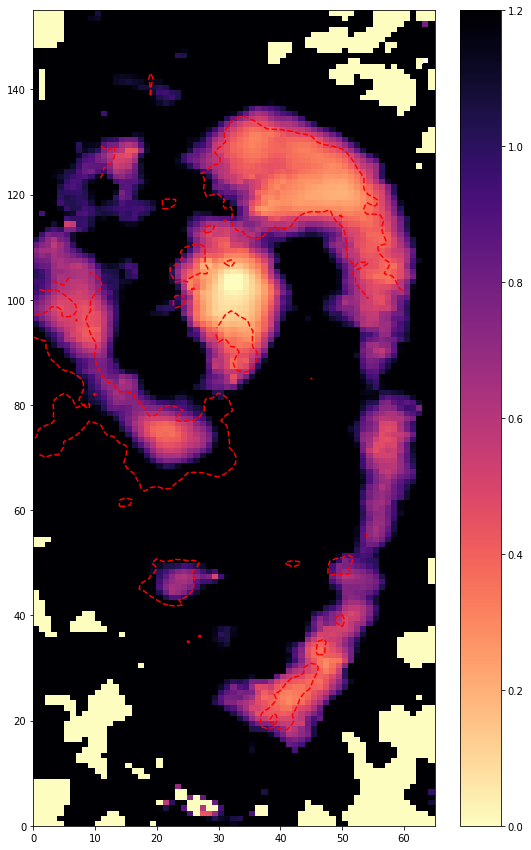

In [77]:
X,Y = np.meshgrid(np.arange(0.,66,1), np.arange(0.,156,1))
fig = plt.figure(figsize=[9,15])
CS = plt.contour(X, Y, np.log10(H_alpha), levels=[-14.2,-12], aspect='auto', alpha=1, colors='red')
quadmesh = plt.pcolormesh(X, Y, shear_method, cmap='magma_r')
quadmesh.set_clim(vmin = 0., vmax = 1.2)
plt.colorbar()

Построим график зависимости A(R)  

In [78]:
velocity_approx = poly1d(polyfit(r_HI, vel_HI, deg=4))
A = []
R = np.array(np.linspace(0.1,10.,100))

for dist in R:
    A.append(0.5 * (velocity_approx(dist) / dist - velocity_approx.deriv()(dist)))

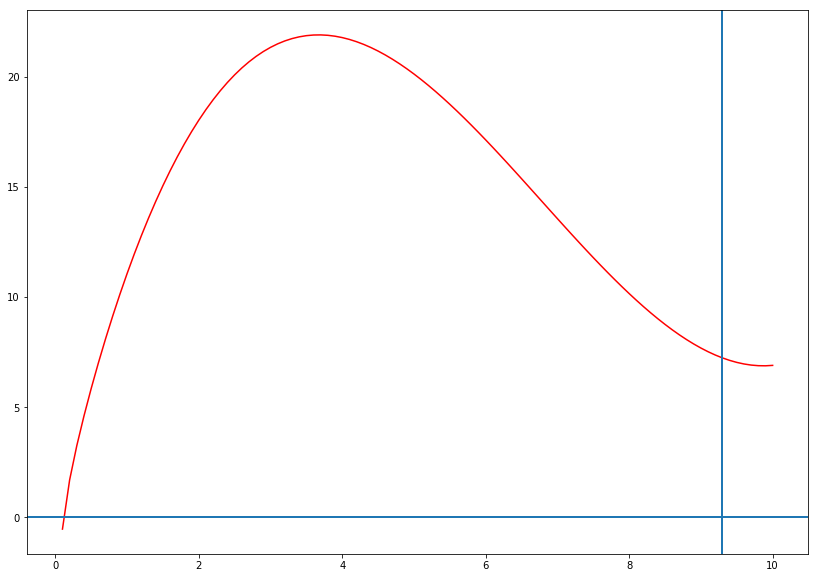

In [79]:
plt.figure(figsize=[14,10])
plt.plot(R,A, color='red')
plt.axhline(y = 0., lw = 2)
plt.axvline(x = 9.3, lw = 2)

# 3. Cold phase

$$ \Sigma_{SO_4} = \dfrac{6.1}{M_{\odot} pc^{-2}} f_g^{0.3}\left(\dfrac{Z}{0.1 Z_{\odot}}\right)^{-0.3} \left(\dfrac{I}{10^6 cm^{-2}s^{-1}}\right)^{0.23} $$

$$f_g = \dfrac{\Sigma_{gas}}{\Sigma_{gas}+\Sigma_{star}}$$

$$I = 10^6 cm^{-2}s^{-1}\left(\dfrac{\Sigma_{SFR}}{5\cdot 10^4 M_{\odot} yr^{-1} pc^{-2}}\right) $$

Если $\Sigma_{gas} > \Sigma_{SO_4}$, то облать гравитационно нестабильна

In [85]:
Sigma_s = np.load('./data/Sigma_s.npy')
cold_phase = np.zeros(dist_kpc.shape)
I = np.zeros(dist_kpc.shape)
I = Sigma_SFR * 5. * 10**10
Z_sun = 0.012
for i, row in enumerate(dist_kpc):
    for j, col in enumerate(dist_kpc[0]):
        Sigma_gas = 1.36 * (Sigma_HI[i][j]+Sigma_H2[i][j])
        f = Sigma_gas / (Sigma_gas + Sigma_s[i][j])
        Sigma_SO = 6.1 * np.power(f, 0.3,dtype = np.float)  * np.power(I[i][j], 0.23,dtype = np.float)
        cold_phase[i][j] = Sigma_SO / Sigma_gas  * np.power(Z[i][j]/Z_sun/0.1, -0.3,dtype = np.float) 

/home/lera/.local/lib/python3.5/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in power
  # Remove the CWD from sys.path while we load stuff.
/home/lera/.local/lib/python3.5/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in power
  # This is added back by InteractiveShellApp.init_path()


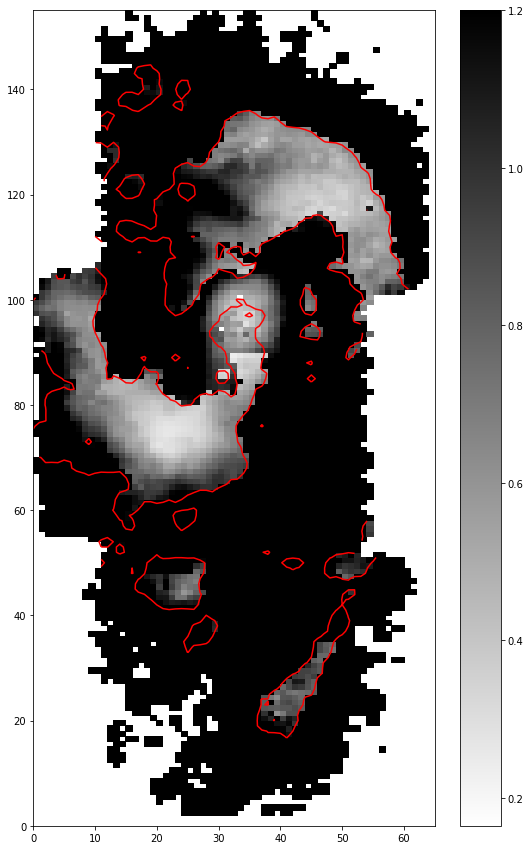

In [86]:
X,Y = np.meshgrid(np.arange(0.,66,1), np.arange(0.,156,1))
fig = plt.figure(figsize=[9,15])
CS = plt.contour(X, Y, Sigma_SFR, levels=[0.021,], aspect='auto', alpha=1, colors='red')
#CS = plt.contour(X, Y, Z, levels=[0,1], aspect='auto', alpha=1, colors='green')
quadmesh = plt.pcolormesh(X, Y, cold_phase, cmap='gist_yarg')

quadmesh.set_clim( vmax = 1.2)
plt.colorbar()

In [87]:
Inst_field = np.zeros(dist_kpc.shape)

for i, row in enumerate(dist_kpc):
    for j, col in enumerate(dist_kpc[0]):
        if(0. < cold_phase[i][j] <= 1.):
            Inst_field[i][j] = 1
        if(cold_phase[i][j] > 1.): 
            Inst_field[i][j] = 0
        if(Z[i][j] == NAN):
            Inst_field[i][j] = NAN

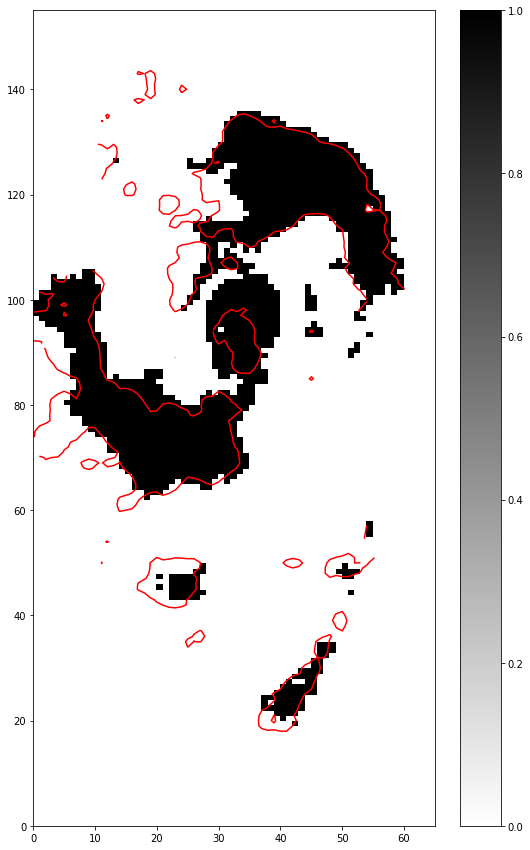

In [88]:
X,Y = np.meshgrid(np.arange(0.,66,1), np.arange(0.,156,1))
fig = plt.figure(figsize=[9,15])
CS = plt.contour(X, Y, Sigma_SFR, levels=[0.032,], aspect='auto', alpha=1, colors='red')
quadmesh = plt.pcolormesh(X, Y, Inst_field, cmap='gist_yarg')
plt.colorbar()

## Модель Romeo

In [80]:
G = 4.32
Qeff_max_rom = np.zeros(dist_kpc.shape)
Qeff_min_rom = np.zeros(dist_kpc.shape)
rom_comp_min = np.zeros(dist_kpc.shape)
rom_comp_max = np.zeros(dist_kpc.shape)
Sigma_g = np.zeros(dist_kpc.shape)

step = 0
errors = 0
for i, row in enumerate(dist_kpc):
    for j, col in enumerate(dist_kpc[0]):
        step+=1
        if step % 1000 == 0:
            print (step)
        c = sigma_HI[i][j]/1000.
        Sigma_g[i][j] = 1.36*(Sigma_HI[i][j] + Sigma_H2[i][j])
        kappa = functions.epic_freq(velocity_approx, dist_kpc[i][j], dR)
        s_R_max = sig_R_max[i][j]
        s_R_min = sig_R_min[i][j]
        try:
            rom_max, comp = functions.romeo_Qinv(r=None, epicycl=kappa, sound_vel_CO=c, sound_vel_HI=c, 
                            sigma_R=s_R_max, 
                            star_density=Sigma_s[i][j], HI_density=Sigma_HI[i][j], CO_density=Sigma_H2[i][j], 
                            alpha=0.3, thin=True, verbose=False)
        except ValueError:
            errors+=1
            rom_max = 0.01
            comp = 'error'
        Qeff_max_rom[i][j] = 1./rom_max
        if comp == 'star':
            marker = 1
        elif comp == 'HI':
            marker = 2
        elif comp == 'H2':
            marker = 3
        elif comp == 'error':
            marker = 0
        rom_comp_max[i][j] = marker
        
        try:
            rom_min, comp = functions.romeo_Qinv(r=None, epicycl=kappa, sound_vel_CO=c, sound_vel_HI=c, 
                            sigma_R=s_R_min, 
                            star_density=Sigma_s[i][j], HI_density=Sigma_HI[i][j], CO_density=Sigma_H2[i][j], 
                            alpha=0.7, thin=True, verbose=False)
        except ValueError:
            errors+=1
            rom_min = 0.01
            comp = 'error'
        Qeff_min_rom[i][j] = 1./rom_min
        if comp == 'star':
            marker = 1
        elif comp == 'HI':
            marker = 2
        elif comp == 'H2':
            marker = 3
        elif comp == 'error':
            marker = 0
        rom_comp_min[i][j] = marker

        
print ('Errors:{}'.format(errors))

functions.ipynb:39: RuntimeWarning: invalid value encountered in double_scalars
  "    X,Y=np.meshgrid(np.arange(0,width,1),np.arange(0,height,1))\n",


1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
Errors:0


Text(0.5, 1.0, 'rom_comp_min')

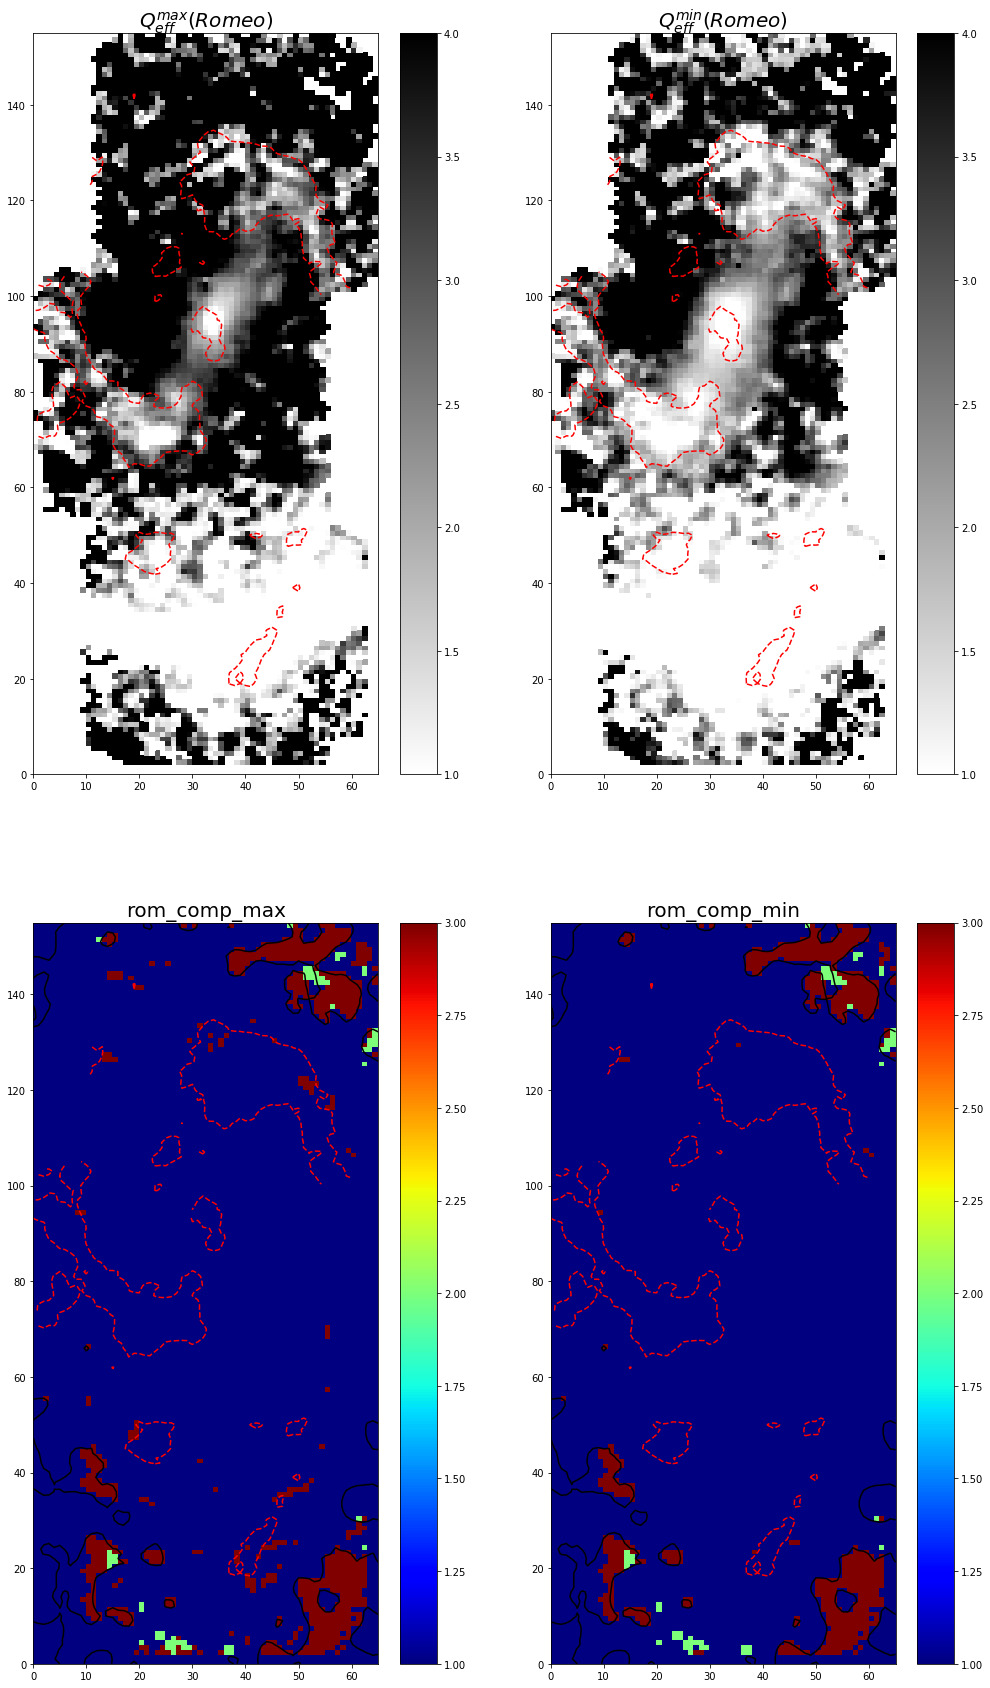

In [81]:
X,Y = np.meshgrid(np.arange(0.,66,1), np.arange(0.,156,1))
plt.figure(figsize=[17, 30])
plt.subplot(2,2,1)
CS = plt.contour(X, Y, np.log10(H_alpha), levels=[-14.15,-12], aspect='auto', alpha=1, colors='red')
quadmesh = plt.pcolormesh(X, Y, Qeff_max_rom, cmap='gist_yarg')
quadmesh.set_clim(vmin=1., vmax=4.)
quadmesh.cmap.set_under('white')
plt.colorbar()
plt.title(r'$Q_{eff}^{max}(Romeo)$', fontsize=20)

plt.subplot(2,2,2)
CS = plt.contour(X, Y, np.log10(H_alpha), levels=[-14.15,-12], aspect='auto', alpha=1, colors='red')
quadmesh = plt.pcolormesh(X, Y,Qeff_min_rom, cmap='gist_yarg')
quadmesh.set_clim(vmin=1., vmax=4.)
quadmesh.cmap.set_under('white')
plt.colorbar()
plt.title(r'$Q_{eff}^{min}(Romeo)$', fontsize=20)

plt.subplot(2,2,3)
CS = plt.contour(X, Y, np.log10(H_alpha), levels=[-14.15,-12], aspect='auto', alpha=1, colors='red')
CS = plt.contour(X, Y, Sigma_H2, levels=[-10,0], aspect='auto', alpha=1, colors='black')
#CS = plt.contour(X, Y, Sigma_HI, levels=[-10,0], aspect='auto', alpha=1, colors='black')
quadmesh = plt.pcolormesh(X, Y, rom_comp_max, cmap='jet')
#quadmesh.set_clim(vmin=1., vmax=4.)
plt.colorbar()
plt.title('rom_comp_max', fontsize=20)

plt.subplot(2,2,4)
CS = plt.contour(X, Y, np.log10(H_alpha), levels=[-14.15,-12], aspect='auto', alpha=1, colors='red')
CS = plt.contour(X, Y, Sigma_H2, levels=[-10,0], aspect='auto', alpha=1, colors='black')
#CS = plt.contour(X, Y, Sigma_HI, levels=[-10,0], aspect='auto', alpha=1, colors='black')
quadmesh = plt.pcolormesh(X, Y,rom_comp_min, cmap='jet')
#quadmesh.set_clim(vmin=1., vmax=4.)
quadmesh.cmap.set_under('white')
plt.colorbar()
plt.title(r'rom_comp_min', fontsize=20)


# Статистика.

$$precision = \frac{TP}{TP+FP}$$ 

$$recall = \frac{TP}{TP+FN}$$ 

$$F1 = 2 \frac{precision \cdot recall}{precision + recall}$$

## Для Тумре

In [82]:
precision3_cut=[]
recall3_cut = []
F13_cut = []
qlim = 3.
for i, hlim in enumerate(np.linspace(-15.5, -13.2, 50)):
    TP = 0
    FP = 0
    FN = 0
    for k, row in enumerate(dist_kpc):
        for l, col in enumerate(dist_kpc[0]):
            if (k > 60):
                if (0 <= Qeff_max[k][l] <= qlim) & (np.log10(H_alpha[k][l]) >= hlim):
                    TP+=1
                    
                if (Qeff_min[k][l] >= qlim) & (np.log10(H_alpha[k][l]) >= hlim):  
                    FN+=1 
                if (0 <= Qeff_max[k][l] <= qlim) & (np.log10(H_alpha[k][l]) <= hlim):
                    FP+=1
         
    precision3_cut.append(TP/(TP + FP))
    recall3_cut.append(TP/(TP + FN))
    F13_cut.append(2*precision3_cut[i] * recall3_cut[i]/(precision3_cut[i] + recall3_cut[i]))

In [83]:
precision3=[]
recall3 = []
F13 = []
qlim = 3.
for i, hlim in enumerate(np.linspace(-15.5, -13.2, 50)):
    TP = 0
    FP = 0
    FN = 0
    for k, row in enumerate(dist_kpc):
        for l, col in enumerate(dist_kpc[0]):
                if (0 <= Qeff_max[k][l] <= qlim) & (np.log10(H_alpha[k][l]) >= hlim):
                    TP+=1
                    
                if (Qeff_min[k][l] >= qlim) & (np.log10(H_alpha[k][l]) >= hlim):  
                    FN+=1 
                if (0 <= Qeff_max[k][l] <= qlim) & (np.log10(H_alpha[k][l]) <= hlim):
                    FP+=1
         
    precision3.append(TP/(TP + FP))
    recall3.append(TP/(TP + FN))
    F13.append(2*precision3[i] * recall3[i]/(precision3[i] + recall3[i]))

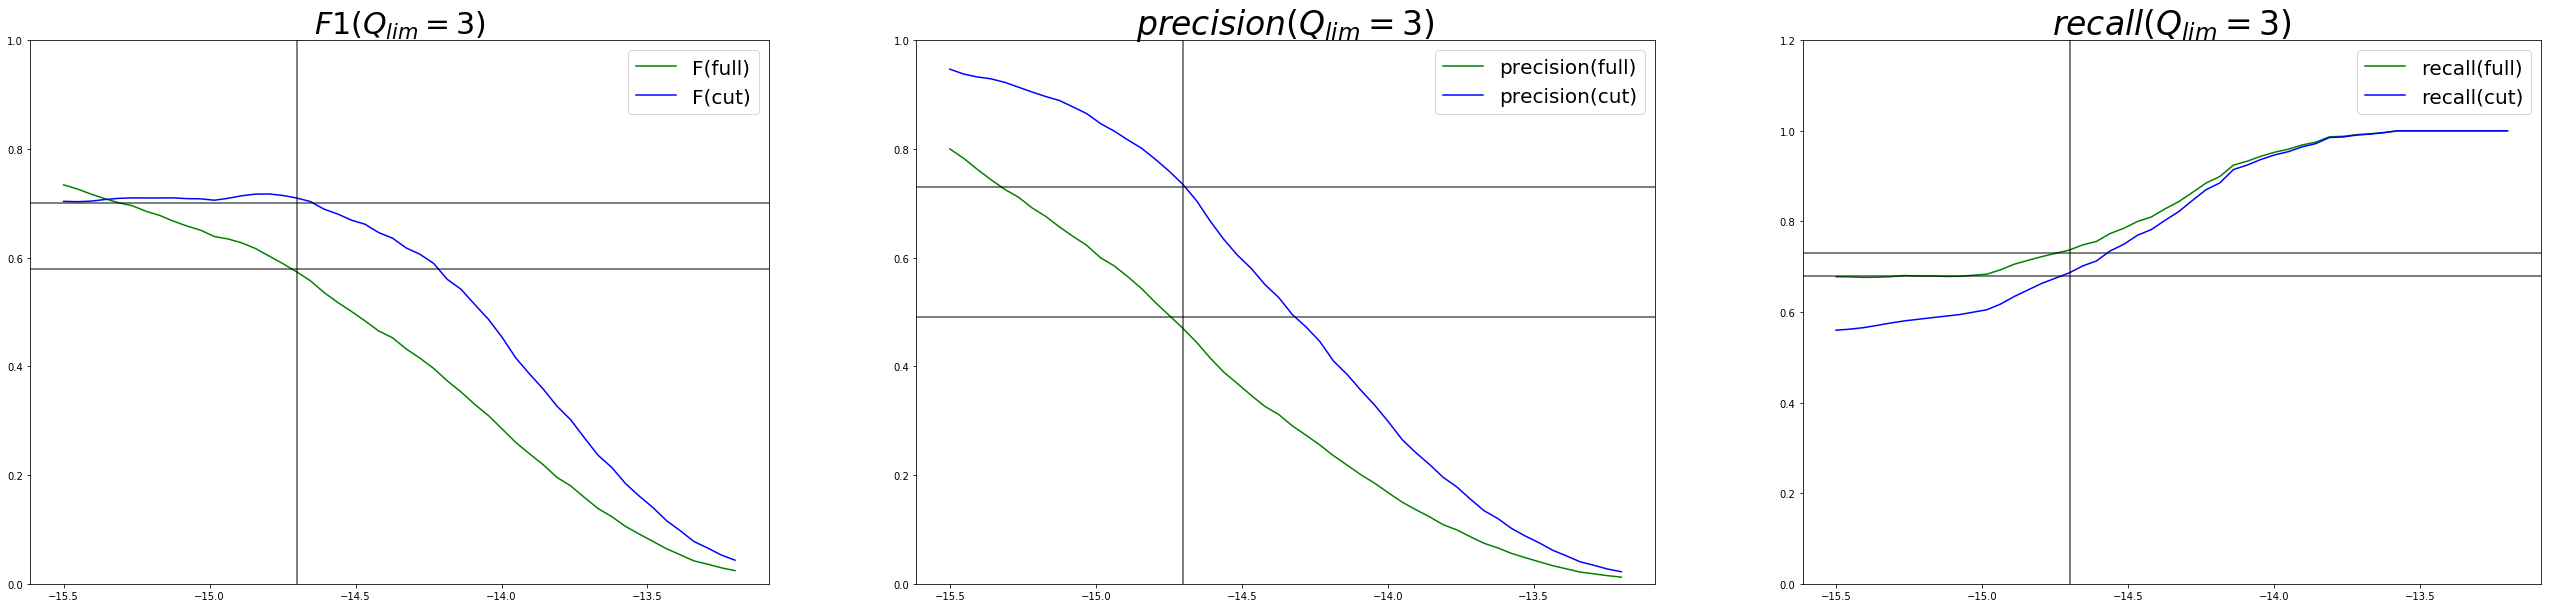

In [84]:
xx =np.array(np.linspace(-15.5, -13.2, 50))
fig = plt.figure(figsize=[45, 10])

plt.subplot(1,3,1)
plt.plot(xx,F13,'-', label='F(full)', color='green')
plt.plot(xx,F13_cut,'-', label='F(cut)', color='blue')
plt.ylim(0.,1.)
plt.title(r'$F1(Q_{lim} = 3)$', fontsize=30)
plt.axvline(x=-14.7, alpha=0.5, color='black', lw=2)
plt.axhline(y = 0.7, alpha=0.5, color='black', lw=2)
plt.axhline(y = 0.58, alpha=0.5, color='black', lw=2)
plt.legend(fontsize = 20)
          
plt.subplot(1,3,2)
plt.plot(xx,precision3,'-', label='precision(full)', color='green')
plt.plot(xx,precision3_cut,'-', label='precision(cut)', color='blue')
plt.title(r'$precision(Q_{lim} = 3)$', fontsize=33)
plt.ylim(0.,1.)
plt.axvline(x=-14.7, alpha=0.5, color='black', lw=2)
plt.axhline(y = 0.49, alpha=0.5, color='black', lw=2)
plt.axhline(y = 0.73, alpha=0.5, color='black', lw=2)
plt.legend(fontsize = 20)
          
plt.subplot(1,3,3)
plt.plot(xx,recall3,'-', label='recall(full)', color='green')
plt.plot(xx,recall3_cut,'-', label='recall(cut)', color='blue')
plt.title(r'$recall(Q_{lim} = 3)$', fontsize=33)
plt.ylim(0.,1.2)
plt.axvline(x=-14.7, alpha=0.5, color='black', lw=2)
plt.axhline(y = 0.68, alpha=0.5, color='black', lw=2)
plt.axhline(y = 0.73, alpha=0.5, color='black', lw=2)
plt.legend(fontsize = 20)

Text(0.5, 1.0, '$Q_{eff}^{max}$')

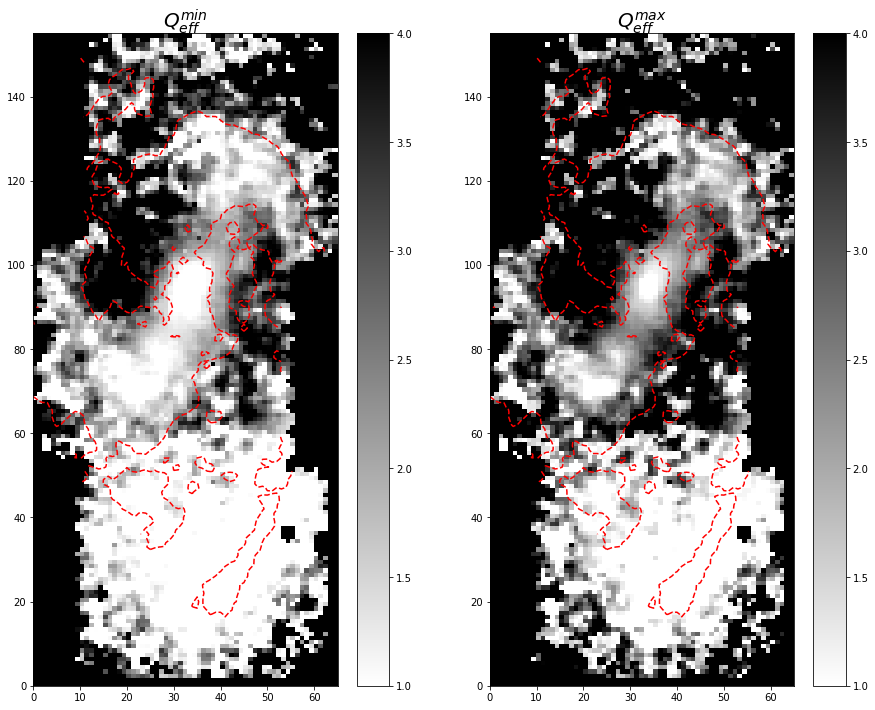

In [85]:
X,Y = np.meshgrid(np.arange(0.,66,1), np.arange(0.,156,1))
plt.figure(figsize=[15, 12])
plt.subplot(1,2,1)
CS = plt.contour(X, Y, np.log10(H_alpha), levels=[-14.7,], aspect='auto', alpha=1, colors='red')
quadmesh = plt.pcolormesh(X, Y, Qeff_min, cmap='gist_yarg')
quadmesh.set_clim(vmin=1., vmax=4.)
plt.colorbar()
plt.title(r'$Q_{eff}^{min}$', fontsize=20)

plt.subplot(1,2,2)
CS = plt.contour(X, Y,np.log10(H_alpha), levels=[-14.7,], aspect='auto', alpha=1, colors='red')
quadmesh = plt.pcolormesh(X, Y, Qeff_max, cmap='gist_yarg')
quadmesh.set_clim(vmin=1., vmax=4.)
quadmesh.cmap.set_under('white')
plt.colorbar()
plt.title(r'$Q_{eff}^{max}$', fontsize=20)

## shear

In [86]:
G = 4.32
dR =(Distance*1000*2*np.pi)/(360*60*60.)
Sigma_crit = np.zeros(dist_kpc.shape)
for i, row in enumerate(dist_kpc):
    for j, col in enumerate(dist_kpc[0]):
 
        A = 0.5 * (velocity_approx(dist_kpc[i][j]) / dist_kpc[i][j] - velocity_approx.deriv()(dist_kpc[i][j]))  
        sigma_g = sigma_HI[i][j]/1000.
  
        Sigma_crit[i][j] = A * sigma_g / np.pi / G # без умножения на alpha_A
    
shear_method = np.zeros(dist_kpc.shape)

for i, row in enumerate(dist_kpc):
    for j, col in enumerate(dist_kpc[0]):
        Sigma_gas = 1.36*(Sigma_HI[i][j] + Sigma_H2[i][j])
        shear_method[i][j] = Sigma_crit[i][j] / Sigma_gas 

In [87]:
precision_shear=np.zeros((30,6))
recall_shear = np.zeros((30,6))
F1_shear = np.zeros((30,6))

for i, alpha_A in enumerate(np.linspace(0.2, 4.5, 30)):
    for j, hlim in enumerate(np.linspace(-14.5, -14.2, 6)):
        TP = 0
        FP = 0
        FN = 0
        for k, row in enumerate(dist_kpc):
            for l, col in enumerate(dist_kpc[0]):
                #if (k > 57) & (np.nan_to_num(H_alpha)[k][l] != 0):
                    if (alpha_A*shear_method[k][l] <= 1) & (np.log10(H_alpha[k][l]) >= hlim):
                        TP+=1
                    
                    if (alpha_A*shear_method[k][l] >= 1) & (np.log10(H_alpha[k][l]) >= hlim):  
                        FN+=1 
                    if (alpha_A*shear_method[k][l] <= 1) & (np.log10(H_alpha[k][l]) <= hlim):
                        FP+=1
         
        precision_shear[i][j] = TP/(TP + FP)
        recall_shear[i][j] = TP/(TP + FN)
        F1_shear[i][j] = 2*precision_shear[i][j] * recall_shear[i][j]/(precision_shear[i][j] + recall_shear[i][j])

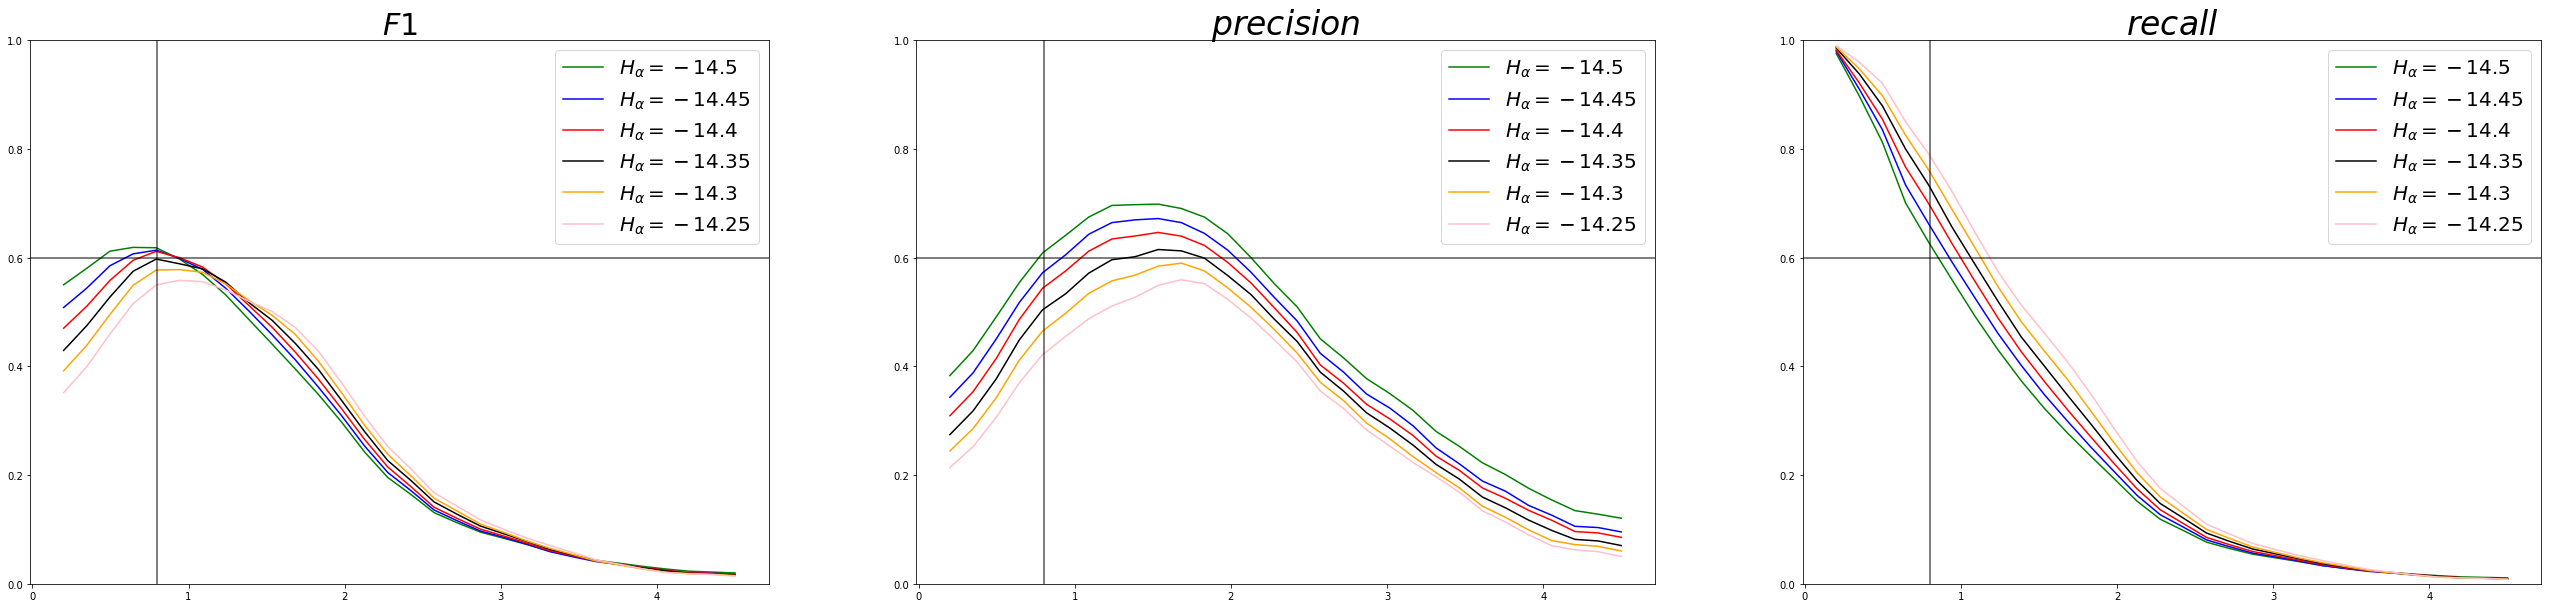

In [89]:
xx =np.array(np.linspace(0.2, 4.5, 30))
fig = plt.figure(figsize=[45, 10])

plt.subplot(1,3,1)
plt.plot(xx,F1_shear[:,0],'-', label=r'$H_\alpha = -14.5$', color='green')
plt.plot(xx,F1_shear[:,1],'-', label=r'$H_\alpha = -14.45$', color='blue')
plt.plot(xx,F1_shear[:,2],'-', label=r'$H_\alpha = -14.4$', color='red')
plt.plot(xx,F1_shear[:,3],'-', label=r'$H_\alpha = -14.35$', color='black')
plt.plot(xx,F1_shear[:,4],'-', label=r'$H_\alpha = -14.3$', color='orange')
plt.plot(xx,F1_shear[:,5],'-', label=r'$H_\alpha = -14.25$', color='pink')
plt.ylim(0.,1.)
plt.title(r'$F1$', fontsize=30)
plt.axvline(x=0.8, alpha=0.5, color='black', lw=2)
plt.axhline(y = 0.6, alpha=0.5, color='black', lw=2)
plt.legend(fontsize = 20)
          
plt.subplot(1,3,2)
plt.plot(xx,precision_shear[:,0],'-', label=r'$H_\alpha = -14.5$', color='green')
plt.plot(xx,precision_shear[:,1],'-', label=r'$H_\alpha = -14.45$', color='blue')
plt.plot(xx,precision_shear[:,2],'-', label=r'$H_\alpha = -14.4$', color='red')
plt.plot(xx,precision_shear[:,3],'-', label=r'$H_\alpha = -14.35$', color='black')
plt.plot(xx,precision_shear[:,4],'-', label=r'$H_\alpha = -14.3$', color='orange')
plt.plot(xx,precision_shear[:,5],'-', label=r'$H_\alpha = -14.25$', color='pink')
plt.title(r'$precision$', fontsize=33)
plt.ylim(0.,1.)
plt.axvline(x=0.8, alpha=0.5, color='black', lw=2)
plt.axhline(y = 0.6, alpha=0.5, color='black', lw=2)
plt.legend(fontsize = 20)
          
plt.subplot(1,3,3)
plt.plot(xx,recall_shear[:,0],'-', label=r'$H_\alpha = -14.5$', color='green')
plt.plot(xx,recall_shear[:,1],'-', label=r'$H_\alpha = -14.45$', color='blue')
plt.plot(xx,recall_shear[:,2],'-', label=r'$H_\alpha = -14.4$', color='red')
plt.plot(xx,recall_shear[:,3],'-', label=r'$H_\alpha = -14.35$', color='black')
plt.plot(xx,recall_shear[:,4],'-', label=r'$H_\alpha = -14.3$', color='orange')
plt.plot(xx,recall_shear[:,5],'-', label=r'$H_\alpha = -14.25$', color='pink')
plt.title(r'$recall$', fontsize=33)
plt.ylim(0.,1.)
plt.axvline(x=0.8, alpha=0.5, color='black', lw=2)
plt.axhline(y = 0.6, alpha=0.5, color='black', lw=2)
plt.legend(fontsize = 20)

Text(0.5, 1.0, '$H_\\alpha$, $\\alpha_A = (-14.5, 0.8)$')

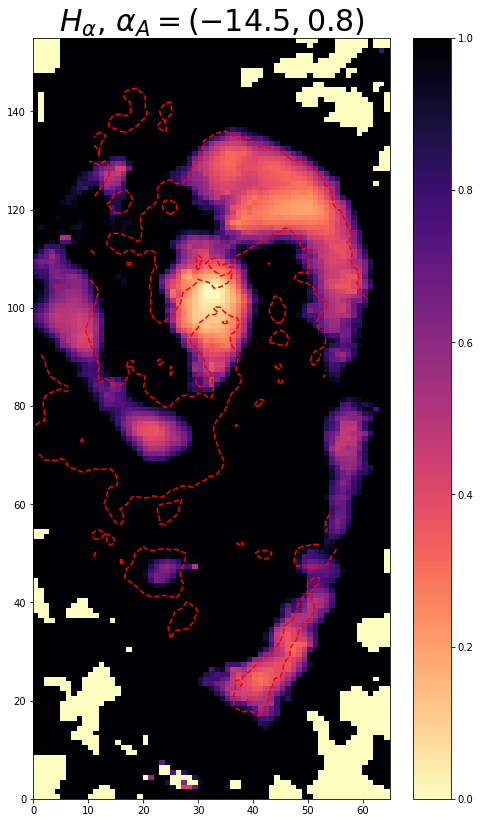

In [91]:
X,Y = np.meshgrid(np.arange(0.,66,1), np.arange(0.,156,1))
fig = plt.figure(figsize=[8,14])
CS = plt.contour(X, Y, np.log10(H_alpha), levels=[-14.5,-12], aspect='auto', alpha=1, colors='red')
quadmesh = plt.pcolormesh(X, Y, 0.8*shear_method, cmap='magma_r')
quadmesh.set_clim(vmin=0., vmax = 1.)
plt.colorbar()
plt.title(r'$H_\alpha$, $\alpha_A = (-14.5, 0.8)$', fontsize=30)

## cold phase

In [89]:
precision=[]
recall = []
F1 = []
for i, hlim in enumerate(np.linspace(-15.5, -13.2, 60)):
    TP = 0
    FP = 0
    FN = 0
    for k, row in enumerate(dist_kpc):
        for l, col in enumerate(dist_kpc[0]):
            if (cold_phase[k][l] <= 1) & (np.log10(H_alpha[k][l]) >= hlim):
                TP+=1
                    
            if (cold_phase[k][l] > 1) & (np.log10(H_alpha[k][l]) >= hlim):  
                FN+=1 
            if (cold_phase[k][l] <= 1) & (np.log10(H_alpha[k][l]) <= hlim):
                FP+=1
         
    precision.append(TP/(TP + FP))
    recall.append(TP/(TP + FN))
    F1.append(2*precision[i] * recall[i]/(precision[i] + recall[i]))
    
    
cold_phase_const = np.load('./data/cold_phase_const.npy')

precision_const=[]
recall_const = []
F1_const = []
for i, hlim in enumerate(np.linspace(-15.5, -13.2, 60)):
    TP = 0
    FP = 0
    FN = 0
    for k, row in enumerate(dist_kpc):
        for l, col in enumerate(dist_kpc[0]):
            if (cold_phase_const[k][l] <= 1) & (np.log10(H_alpha[k][l]) >= hlim):
                TP+=1
                    
            if (cold_phase_const[k][l] > 1) & (np.log10(H_alpha[k][l]) >= hlim):  
                FN+=1 
            if (cold_phase_const[k][l] <= 1) & (np.log10(H_alpha[k][l]) <= hlim):
                FP+=1
         
    precision_const.append(TP/(TP + FP))
    recall_const.append(TP/(TP + FN))
    F1_const.append(2*precision_const[i] * recall_const[i]/(precision_const[i] + recall_const[i]))    

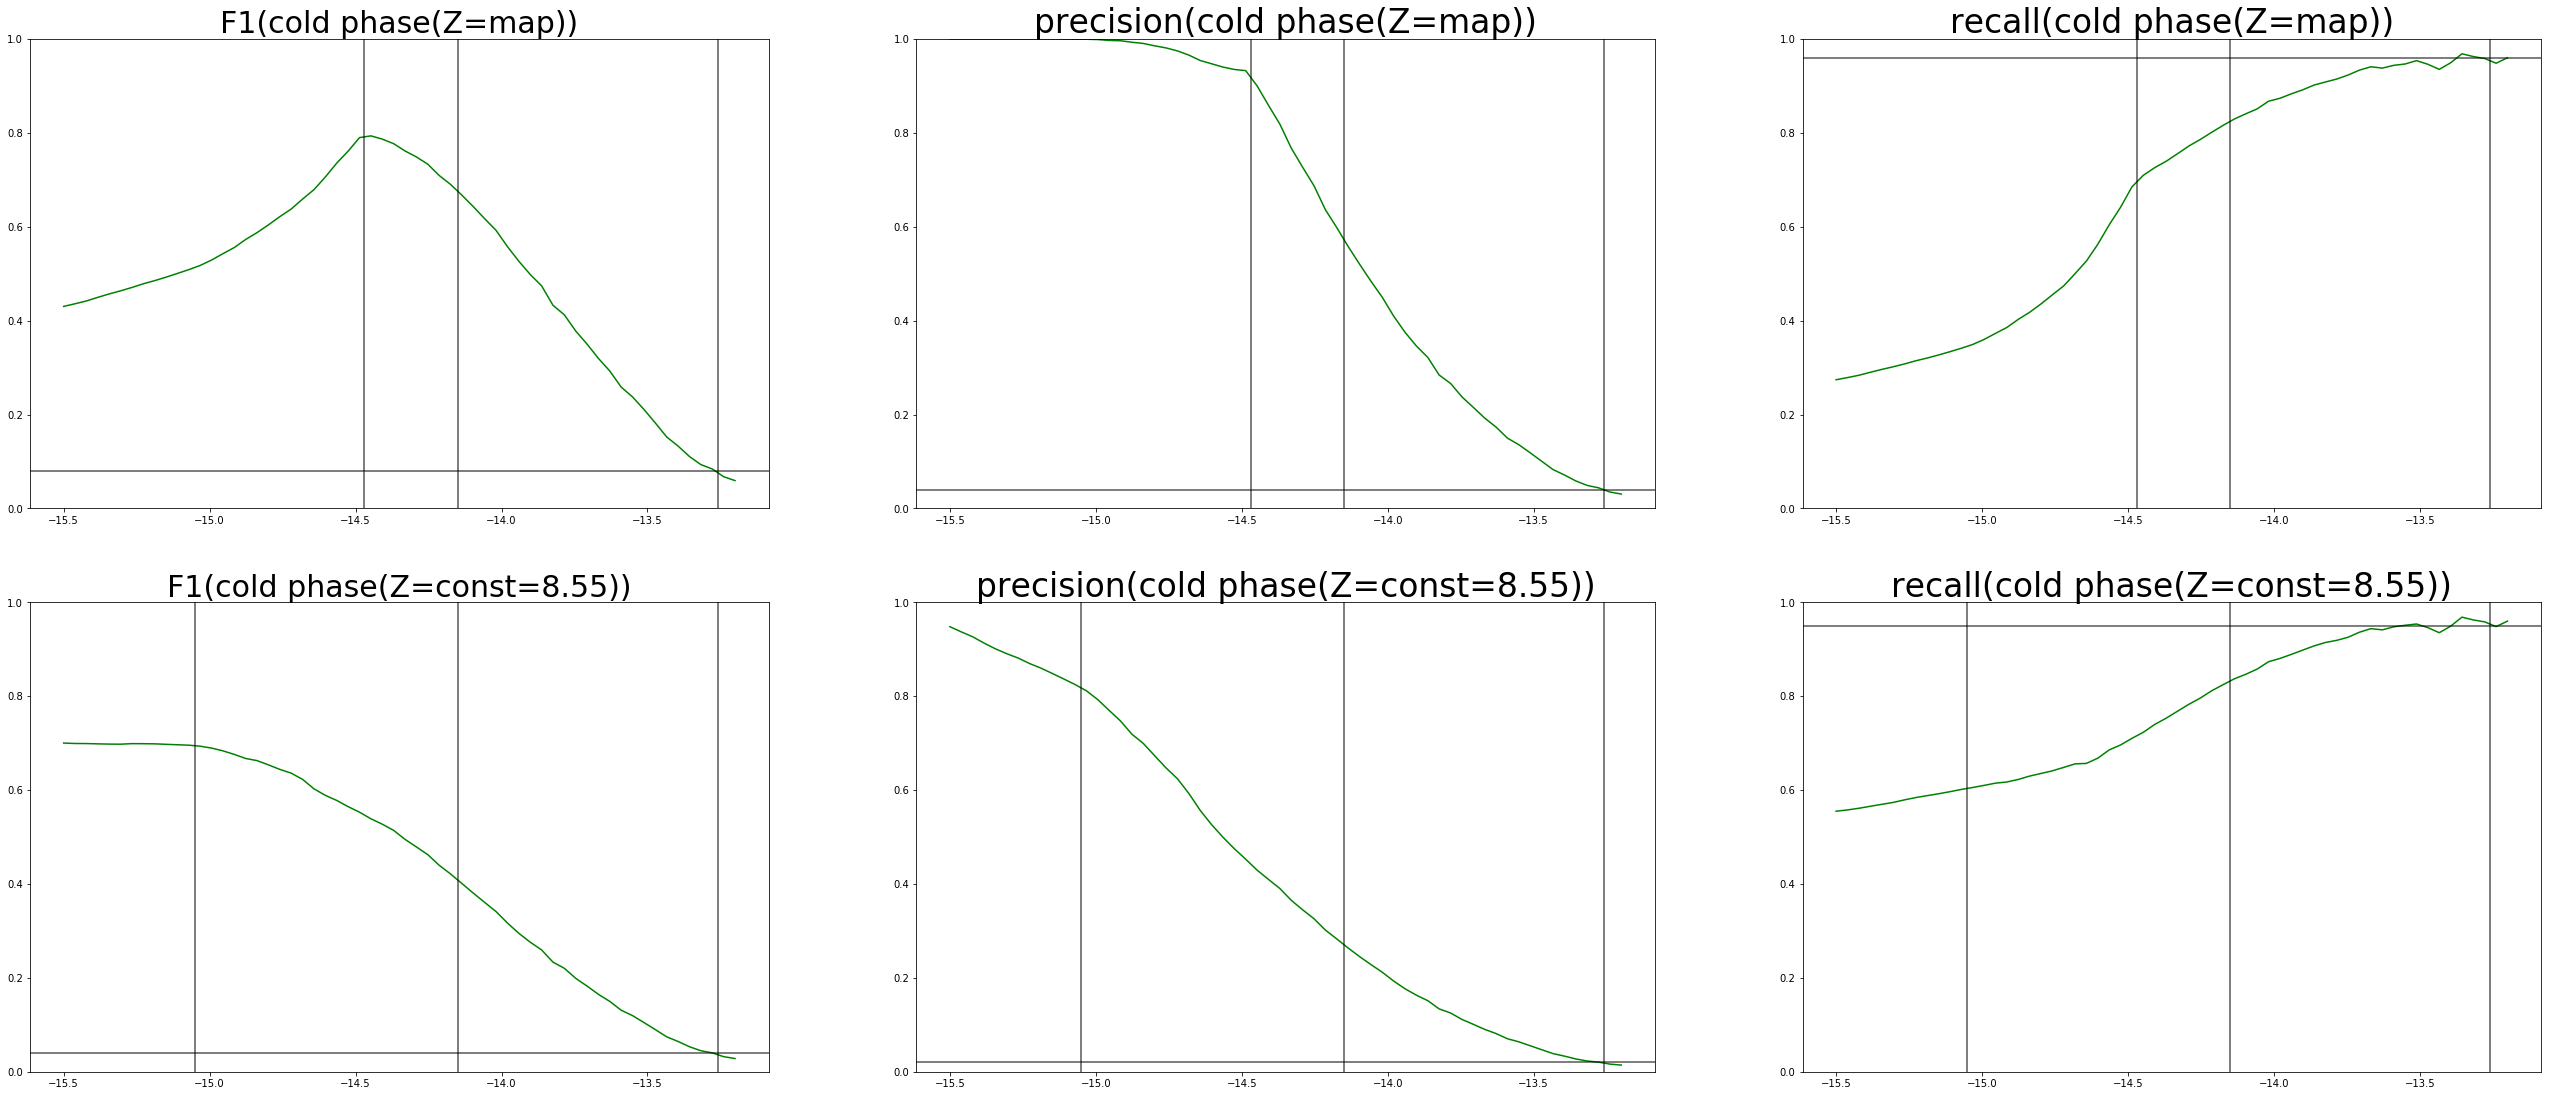

In [90]:
xx =np.array(np.linspace(-15.5, -13.2, 60))
fig = plt.figure(figsize=[45, 19])

plt.subplot(2,3,1)
plt.plot(xx,F1,'-', label='F(full)', color='green')
plt.ylim(0.,1.)
plt.title('F1(cold phase(Z=map))', fontsize=30)
plt.axvline(x=-14.47, alpha=0.5, color='black', lw=2)
plt.axvline(x=-14.15, alpha=0.5, color='black', lw=2)
plt.axvline(x=-13.26, alpha=0.5, color='black', lw=2)
plt.axhline(y = 0.08, alpha=0.5, color='black', lw=2)
          
plt.subplot(2,3,2)
plt.plot(xx,precision,'-', label='precision(full)', color='green')
plt.title('precision(cold phase(Z=map))', fontsize=33)
plt.ylim(0.,1.)
plt.axvline(x=-14.47, alpha=0.5, color='black', lw=2)
plt.axhline(y = 0.04, alpha=0.5, color='black', lw=2)
plt.axvline(x=-13.26, alpha=0.5, color='black', lw=2)
plt.axvline(x=-14.15, alpha=0.5, color='black', lw=2)
          
plt.subplot(2,3,3)
plt.plot(xx,recall,'-', label='recall(full)', color='green')
plt.title('recall(cold phase(Z=map))', fontsize=33)
plt.ylim(0.,1.)
plt.axvline(x=-14.47, alpha=0.5, color='black', lw=2)
plt.axhline(y = 0.96, alpha=0.5, color='black', lw=2)
plt.axvline(x=-13.26, alpha=0.5, color='black', lw=2)
plt.axvline(x=-14.15, alpha=0.5, color='black', lw=2)

plt.subplot(2,3,4)
plt.plot(xx,F1_const,'-', label='F(full)', color='green')
plt.ylim(0.,1.)
plt.title('F1(cold phase(Z=const=8.55))', fontsize=30)
plt.axvline(x=-15.05, alpha=0.5, color='black', lw=2)
plt.axvline(x=-14.15, alpha=0.5, color='black', lw=2)
plt.axvline(x=-13.26, alpha=0.5, color='black', lw=2)
plt.axhline(y = 0.04, alpha=0.5, color='black', lw=2)
          
plt.subplot(2,3,5)
plt.plot(xx,precision_const,'-', label='precision(full)', color='green')
plt.title('precision(cold phase(Z=const=8.55))', fontsize=33)
plt.ylim(0.,1.)
plt.axvline(x=-15.05, alpha=0.5, color='black', lw=2)
plt.axhline(y = 0.02, alpha=0.5, color='black', lw=2)
plt.axvline(x=-13.26, alpha=0.5, color='black', lw=2)
plt.axvline(x=-14.15, alpha=0.5, color='black', lw=2)
          
plt.subplot(2,3,6)
plt.plot(xx,recall_const,'-', label='recall(full)', color='green')
plt.title('recall(cold phase(Z=const=8.55))', fontsize=33)
plt.ylim(0.,1.)
plt.axvline(x=-15.05, alpha=0.5, color='black', lw=2)
plt.axhline(y = 0.95, alpha=0.5, color='black', lw=2)
plt.axvline(x=-13.26, alpha=0.5, color='black', lw=2)
plt.axvline(x=-14.15, alpha=0.5, color='black', lw=2)

# K-Sh law

### угол наклона в зависимости от $SFR^{lim}$

In [78]:
N_H2 = []
points_H2 = []
for hlim in np.array(np.linspace(-17.,-13.,80)):

    x = []
    y = []
    
    for k, row in enumerate(dist_kpc):
        for l, col in enumerate(dist_kpc[0]):
            
            if (np.log10(H_alpha[k][l]) >= hlim) & (Sigma_H2[k][l] > 0.) :
                
                x.append(np.log10(Sigma_H2[k][l]))
                y.append(np.log10(H_alpha[k][l]))
    
    
    gradient, intercept, r_value, p_value, std_err = stats.linregress(y,x)
    N_H2.append(1./gradient)
    points_H2.append(len(y))         

Text(0.5, 0, '$H_{\\alpha}^{lim}$')

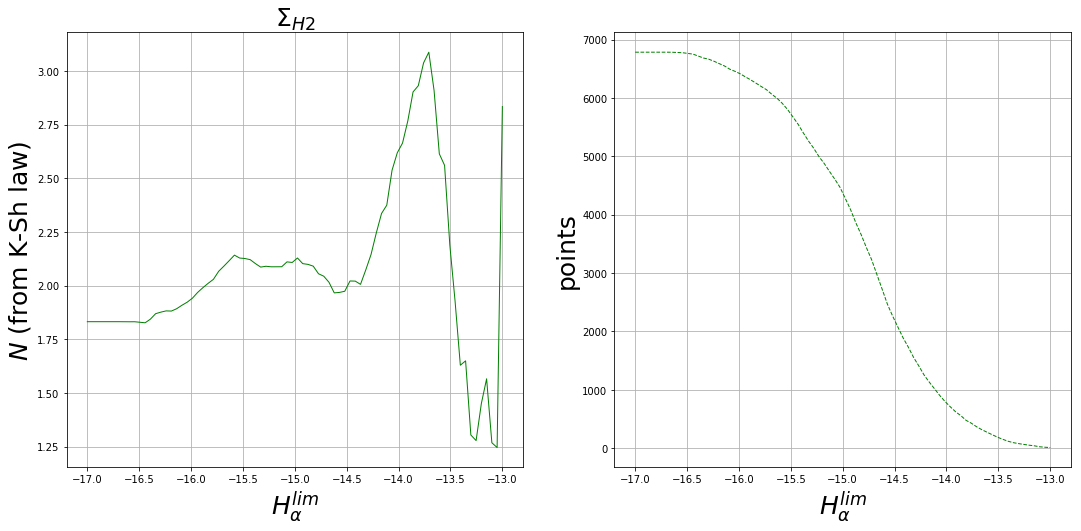

In [79]:
fig = plt.figure(figsize=[18, 8])
plt.subplot(1,2,1)
plt.plot(np.array(np.linspace(-17.,-13.,80)), N_H2, '-', lw=1, color='g')
plt.grid()
plt.ylabel(r'$N$ (from K-Sh law)', fontsize = 25)
plt.xlabel(r'$H_{\alpha}^{lim}$', fontsize = 25)
plt.title(r'$\Sigma_{H2}$',fontsize = 25)

plt.subplot(1,2,2)
plt.plot(np.array(np.linspace(-17.,-13.,80)),points_H2, '--', lw=1, color='g')
plt.grid()
plt.ylabel('points', fontsize = 25)
plt.xlabel(r'$H_{\alpha}^{lim}$', fontsize = 25)

In [80]:

H_alpha = np.load('./data/H_alpha.npy')
Sigma_HI = np.load('./data/Sigma_HI.npy')

N_HI = []
points_HI = []
for hlim in np.array(np.linspace(-17.,-13.,80)):

    x = []
    y = []
    
    for k, row in enumerate(dist_kpc):
        for l, col in enumerate(dist_kpc[0]):
            
            if (np.log10(H_alpha[k][l]) >= hlim) & (Sigma_HI[k][l] > 0.) :
                
                
                x.append(np.log10(Sigma_HI[k][l]))
                y.append(np.log10(H_alpha[k][l]))
    
    
    gradient, intercept, r_value, p_value, std_err = stats.linregress(y,x)
    N_HI.append(1./gradient)
    points_HI.append(len(y))        

Text(0.5, 0, '$H_{\\alpha}^{lim}$')

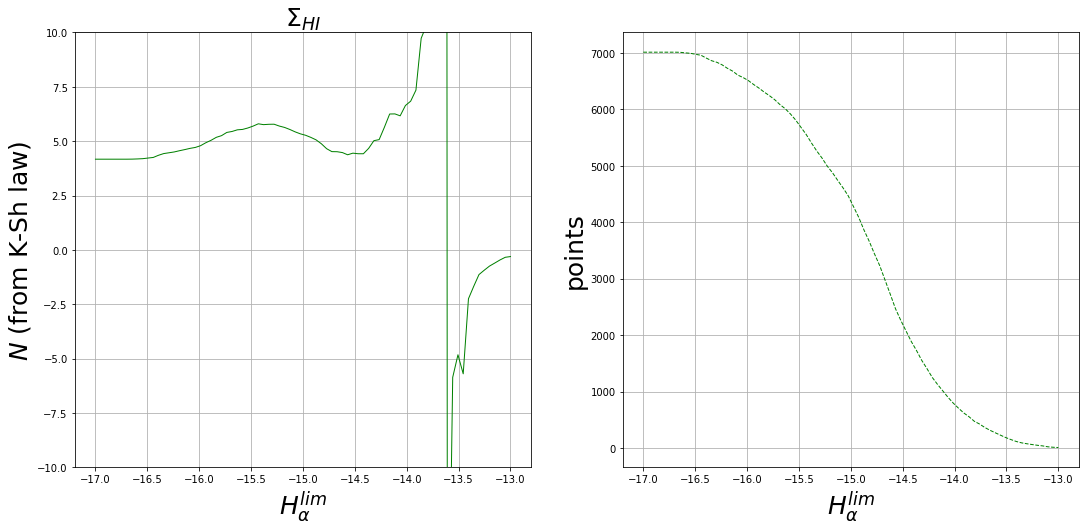

In [81]:
fig = plt.figure(figsize=[18, 8])
plt.subplot(1,2,1)
plt.plot(np.array(np.linspace(-17.,-13.,80)), N_HI, '-', lw=1, color='g')
plt.grid()
plt.ylabel(r'$N$ (from K-Sh law)', fontsize = 25)
plt.xlabel(r'$H_{\alpha}^{lim}$', fontsize = 25)
plt.ylim(-10,10)
plt.title(r'$\Sigma_{HI}$',fontsize = 25)

plt.subplot(1,2,2)
plt.plot(np.array(np.linspace(-17.,-13.,80)),points_HI, '--', lw=1, color='g')
plt.grid()
plt.ylabel('points', fontsize = 25)
plt.xlabel(r'$H_{\alpha}^{lim}$', fontsize = 25)

In [82]:
Sigma_g = 1.36*(Sigma_HI + Sigma_H2) 
N_gas = []
points_gas = []
for hlim in np.array(np.linspace(-17.,-13.,80)):

    x = []
    y = []
    
    for k, row in enumerate(dist_kpc):
        for l, col in enumerate(dist_kpc[0]):
            
            if (np.log10(H_alpha[k][l]) >= hlim) & (Sigma_g[k][l] > 0.) :
                
                x.append(np.log10(Sigma_g[k][l]))
                y.append(np.log10(H_alpha[k][l]))
    
    
    gradient, intercept, r_value, p_value, std_err = stats.linregress(y,x)
    N_gas.append(1./gradient)
    points_gas.append(len(y))

Text(0.5, 0, '$H_{\\alpha}^{lim}$')

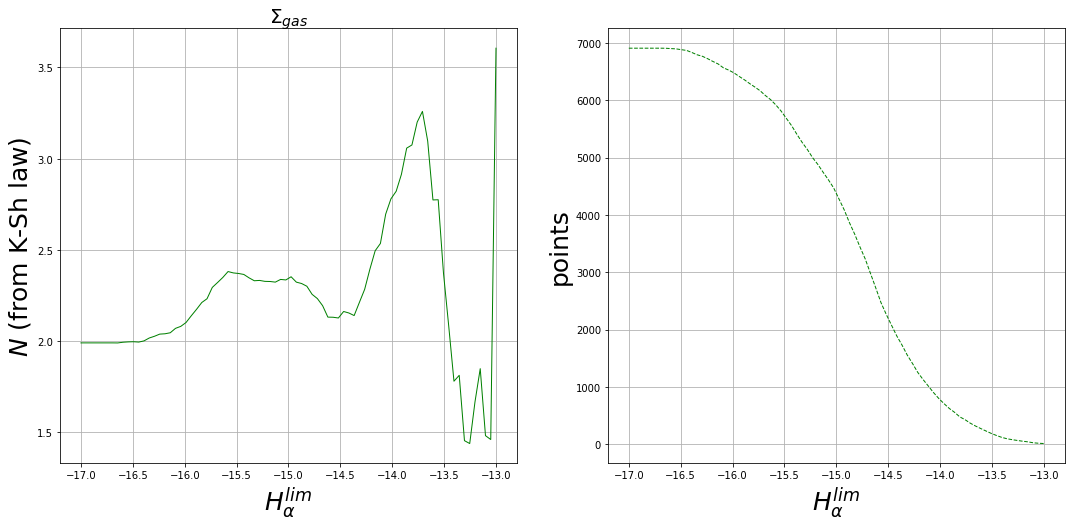

In [83]:
fig = plt.figure(figsize=[18, 8])
plt.subplot(1,2,1)
plt.plot(np.array(np.linspace(-17.,-13.,80)), N_gas, '-', lw=1, color='g')
plt.grid()
plt.ylabel(r'$N$ (from K-Sh law)', fontsize = 25)
plt.xlabel(r'$H_{\alpha}^{lim}$', fontsize = 25)
plt.title(r'$\Sigma_{gas}$',fontsize = 20)

plt.subplot(1,2,2)
plt.plot(np.array(np.linspace(-17.,-13.,80)),points_gas, '--', lw=1, color='g')
plt.grid()
plt.ylabel('points', fontsize = 25)
plt.xlabel(r'$H_{\alpha}^{lim}$', fontsize = 25)

# Проверим на чувствительность модель грав. неустойчивости

## Варьируем $\Sigma_{H2}$

In [161]:
dR =0.2#(Distance*1000*2*np.pi)/(360*60*60.)
G = 4.32
step = 0
mean_error_min = []
std_error_min = []
array_errors = []

for percent in np.arange(-35.,40.,5.):
    Sigma_H2_ = (1. + percent/100.) * Sigma_H2
    Qeff_min_ = np.zeros(dist_kpc.shape)
    Sigma_g = np.zeros(dist_kpc.shape)
    errors_min = np.zeros(dist_kpc.shape)
    errors = []   
    bugs = 0
    for i, row in enumerate(dist_kpc):
        for j, col in enumerate(dist_kpc[0]):
            step+=1
 #           if step % 1000 == 0:
  #              print(step)
            c = sigma_HI[i][j]/1000.
            Sigma_g[i][j] = 1.36*(Sigma_HI[i][j] + Sigma_H2_[i][j])
            kappa = functions.epic_freq(velocity_approx, dist_kpc[i][j], dR)
            Sigma_s_ = Sigma_s[i][j]
            s_R_max = sig_R_max[i][j]
            s_R_min = sig_R_min[i][j]
            Qg = kappa * c / (math.pi * G * Sigma_g[i][j])
            Qs_max = kappa * s_R_max / (3.36 * G * Sigma_s_)
            Qs_min = kappa * s_R_min / (3.36 * G * Sigma_s_)
        
       
            try:
                root,qeff = functions.FindMaxQeffKinem(rangek=np.arange(0.01, 50., 1.), Qs=Qs_min, Qg=Qg, s=c/s_R_min)
            except ValueError:
                bugs+=1
                qeff = 0.01
            Qeff_min_[i][j] = 1./qeff
          
    for i, row in enumerate(dist_kpc):
        for j, col in enumerate(dist_kpc[0]):
            errors_min[i][j] = Qeff_min_[i][j]*100./Qeff_min[i][j] - 100
            errors.append(Qeff_min_[i][j]*100./Qeff_min[i][j] - 100)
            
    array_errors.append(errors)
    mean_error_min.append(errors_min.mean())
    std_error_min.append(errors_min.std())

    
np.save('./data/mean_error_Sigma_H2.npy',mean_error_min)
np.save('./data/array_errors_Sigma_H2.npy',array_errors)
np.save('./data/std_error_Sigma_H2.npy',std_error_min)
    
    

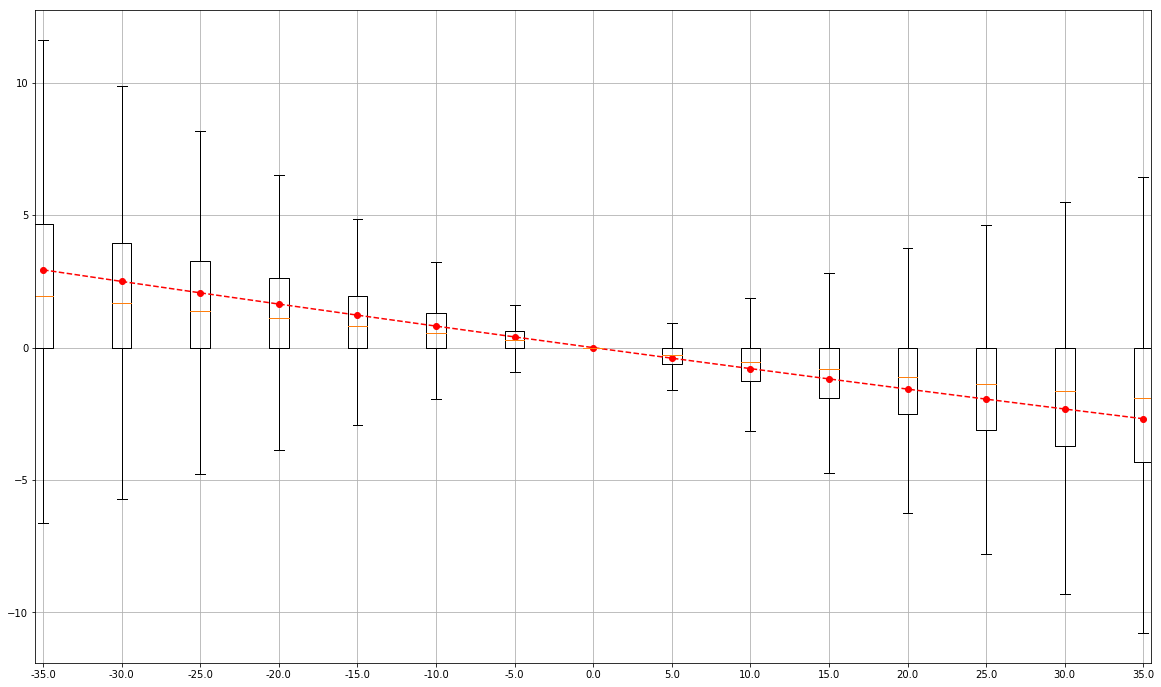

In [162]:

array_errors = np.load('./data/array_errors_Sigma_H2.npy')
array_errors = np.array(np.transpose(array_errors)).reshape(10296,15)
mean_error_min = np.load('./data/mean_error_Sigma_H2.npy')

plt.figure(figsize=[20,12])

plt.boxplot(array_errors, showfliers=False,positions=np.array(np.arange(-35.,40.,5.)), patch_artist =False, widths = 1.25) 
plt.plot(np.array(np.arange(-35.,40.,5.)),mean_error_min, 'o--', color='red')
plt.grid()
#plt.ylim(-5, 5.)
plt.savefig('./images/boxs_Sigma_H2.png', format = 'png', dpi=500)


## Варьируем $\sigma_{s}^{min}$, $\sigma_{s}^{max}$

In [163]:
dR =0.2#(Distance*1000*2*np.pi)/(360*60*60.)
G = 4.32
step = 0
mean_error_min = []
std_error_min = []
array_errors = []

for percent in np.arange(-35.,40.,5.):
       
    Qeff_min_ = np.zeros(dist_kpc.shape)
    Sigma_g = np.zeros(dist_kpc.shape)
    errors_min = np.zeros(dist_kpc.shape)
    errors = []
    bugs = 0
    for i, row in enumerate(dist_kpc):
        for j, col in enumerate(dist_kpc[0]):
            step+=1
            if step % 1000 == 0:
                print(step)
            c = sigma_HI[i][j]/1000.
            Sigma_g[i][j] = 1.36*(Sigma_HI[i][j] + Sigma_H2[i][j])
            kappa = functions.epic_freq(velocity_approx, dist_kpc[i][j], dR)
            Sigma_s_ = Sigma_s[i][j]
            s_R_min = (1. + percent/100.) * sig_R_min[i][j]
            Qg = kappa * c / (math.pi * G * Sigma_g[i][j])
            Qs_max = kappa * s_R_max / (3.36 * G * Sigma_s_)
            Qs_min = kappa * s_R_min / (3.36 * G * Sigma_s_)
        
       
            try:
                root,qeff = functions.FindMaxQeffKinem(rangek=np.arange(0.01, 50., 1.), Qs=Qs_min, Qg=Qg, s=c/s_R_min)
            except ValueError:
                bugs+=1
                qeff = 0.01
            Qeff_min_[i][j] = 1./qeff
                
                     
    for i, row in enumerate(dist_kpc):
        for j, col in enumerate(dist_kpc[0]):
            errors_min[i][j] = Qeff_min_[i][j]*100./Qeff_min[i][j] - 100
            errors.append(Qeff_min_[i][j]*100./Qeff_min[i][j] - 100)
            
    array_errors.append(errors)
    mean_error_min.append(errors_min.mean())
    std_error_min.append(errors_min.std())

    
np.save('./data/mean_error_sigma_s.npy',mean_error_min)
np.save('./data/array_errors_sigma_s.npy',array_errors)
np.save('./data/std_error_sigma_s.npy',std_error_min)    
        

1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000
87000
88000
89000
90000
91000
92000
93000
94000
95000
96000
97000
98000
99000
100000
101000
102000
103000
104000
105000
106000
107000
108000
109000
110000
111000
112000
113000
114000
115000
116000
117000
118000
119000
120000
121000
122000
123000
124000
125000
126000
127000
128000
129000
130000
131000
132000
133000
134000
135000
136000
137000
138000
139000
140000
141000
142000
143000
144000
145000
146000
147000
148000
149000
150000
151000
152000
153000
154000


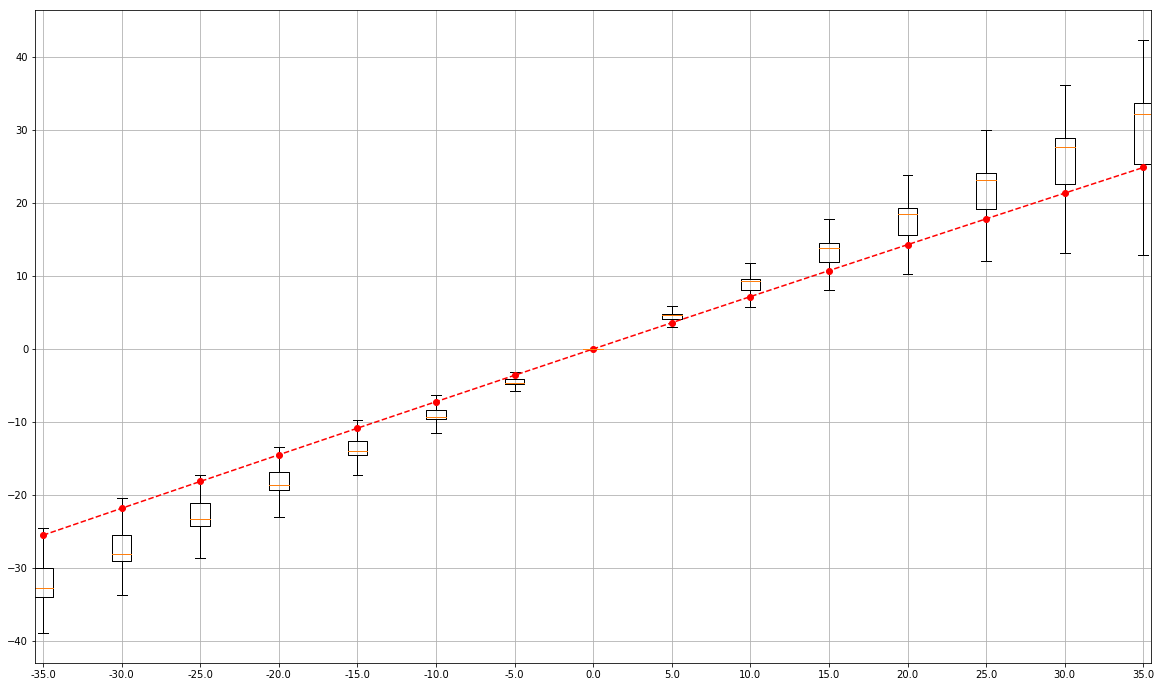

In [164]:

array_errors = np.load('./data/array_errors_sigma_s.npy')
array_errors = np.array(np.transpose(array_errors)).reshape(10296,15)
mean_error_min  =  np.load('./data/mean_error_sigma_s.npy')
plt.figure(figsize=[20,12])

plt.boxplot(array_errors,showfliers=False, positions=np.array(np.arange(-35.,40.,5.)),patch_artist = False, widths = 1.25) 
plt.plot(np.array(np.arange(-35.,40.,5.)),mean_error_min, 'o--', color='red')
plt.grid()
#plt.ylim(-5, 5.)


## Варьируем $\Sigma_{HI}$

In [165]:
G = 4.32
step = 0
mean_error_min = []
std_error_min = []
array_errors = []
array_bark = []
for percent in np.arange(-35.,40.,5.):
    Sigma_HI_ = (1. + percent/100.) * Sigma_HI
    
    Qeff_max_ = np.zeros(dist_kpc.shape)
    bark_ = np.zeros(dist_kpc.shape)
    Qeff_min_ = np.zeros(dist_kpc.shape)
    Sigma_g = np.zeros(dist_kpc.shape)
    errors_min = np.zeros(dist_kpc.shape)
    errors_max = np.zeros(dist_kpc.shape)
    errors = []
    errors_bark = []
    bugs = 0
    for i, row in enumerate(dist_kpc):
        for j, col in enumerate(dist_kpc[0]):
            step+=1
            if step % 1000 == 0:
                print(step)
            c = sigma_HI[i][j]/1000.
            Sigma_g[i][j] = 1.36*(Sigma_HI_[i][j] + Sigma_H2[i][j])
            kappa = functions.epic_freq(velocity_approx, dist_kpc[i][j], dR)
            Sigma_s_ = Sigma_s[i][j]
            s_R_max = sig_R_max[i][j]
            s_R_min = sig_R_min[i][j]
            Qg = kappa * c / (math.pi * G * Sigma_g[i][j])
            Qs_max = kappa * s_R_max / (3.36 * G * Sigma_s_)
            Qs_min = kappa * s_R_min / (3.36 * G * Sigma_s_)
        
       
            try:
                root,qeff = functions.FindMaxQeffKinem(rangek=np.arange(0.01, 50., 1.), Qs=Qs_min, Qg=Qg, s=c/s_R_min)
            except ValueError:
                bugs+=1
                qeff = 0.01
                root = -1.
            Qeff_min_[i][j] = 1./qeff
            bark_[i][j] = root   
                     
    for i, row in enumerate(dist_kpc):
        for j, col in enumerate(dist_kpc[0]):
            errors_min[i][j] = Qeff_min_[i][j]*100./Qeff_min[i][j] - 100
            errors.append(Qeff_min_[i][j]*100./Qeff_min[i][j] - 100)
            errors_bark.append(bark_[i][j]*100./bark[i][j] - 100)
            
            
    array_errors.append(errors)
    mean_error_min.append(errors_min.mean())
    std_error_min.append(errors_min.std())
    array_bark.append(errors_bark)
    
np.save('./data/mean_error_Sigma_HI.npy',mean_error_min)
np.save('./data/array_errors_Sigma_HI.npy',array_errors)
np.save('./data/std_error_Sigma_HI.npy',std_error_min)

1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000
87000
88000
89000
90000
91000
92000
93000
94000
95000
96000
97000
98000
99000
100000
101000
102000
103000
104000
105000
106000
107000
108000
109000
110000
111000
112000
113000
114000
115000
116000
117000
118000
119000
120000
121000
122000
123000
124000
125000
126000
127000
128000
129000
130000
131000
132000
133000
134000
135000
136000
137000
138000
139000
140000
141000
142000
143000
144000
145000
146000
147000
148000
149000
150000
151000
152000
153000
154000


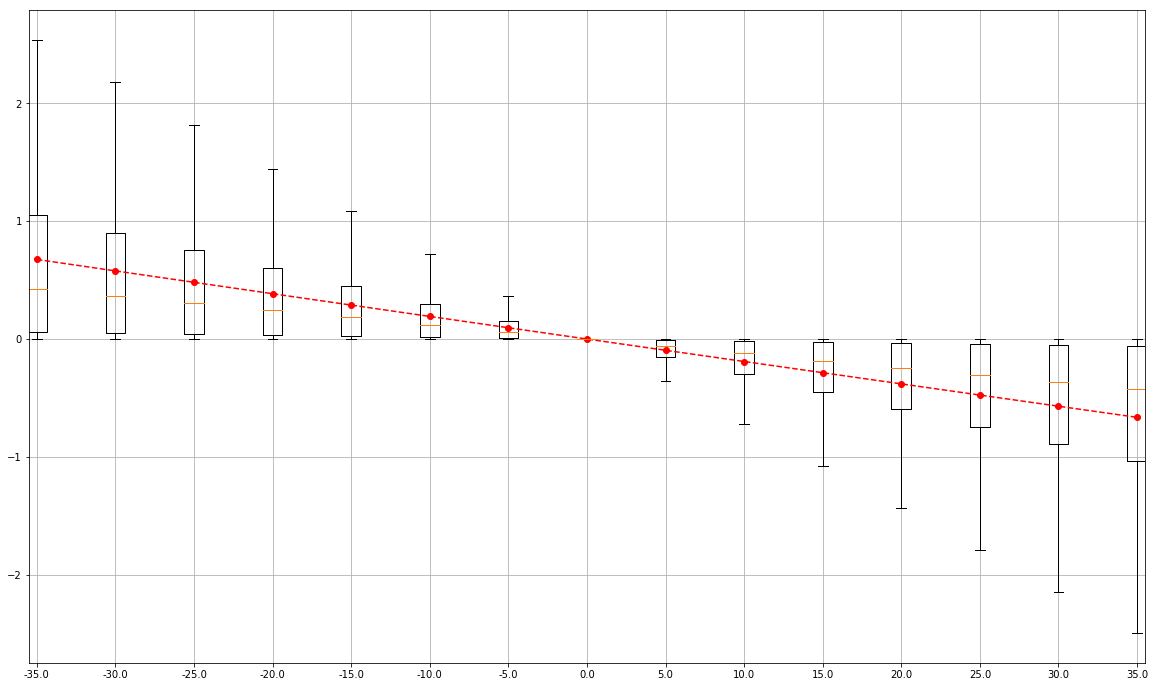

In [166]:
array_errors = np.load('./data/array_errors_Sigma_HI.npy')
array_errors = np.array(np.transpose(array_errors)).reshape(10296,15)
mean_error_min  =  np.load('./data/mean_error_Sigma_HI.npy')
plt.figure(figsize=[20,12])

plt.boxplot(array_errors,positions=np.array(np.arange(-35.,40.,5.)),showfliers=False, patch_artist =False, widths = 1.25) 
plt.plot(np.array(np.arange(-35.,40.,5.)),mean_error_min, 'o--', color='red')
plt.grid()
#plt.ylim(-5, 5.)

## Варьируем $\sigma_{HI}$ 

In [167]:
G = 4.32
step = 0
mean_error_min = []
std_error_min = []
array_errors = []

for percent in np.arange(-35.,40.,5.):
    
    Qeff_max_ = np.zeros(dist_kpc.shape)
    Qeff_min_ = np.zeros(dist_kpc.shape)
    Sigma_g = np.zeros(dist_kpc.shape)
    errors_min = np.zeros(dist_kpc.shape)
    errors_max = np.zeros(dist_kpc.shape)
    errors = []
    bugs = 0
    for i, row in enumerate(dist_kpc):
        for j, col in enumerate(dist_kpc[0]):
            step+=1
            if step % 1000 == 0:
                print(step)
            c = (sigma_HI[i][j]/1000.) * (1. + percent/100.)
            Sigma_g[i][j] = 1.36*(Sigma_HI[i][j] + Sigma_H2[i][j])
            kappa = functions.epic_freq(velocity_approx, dist_kpc[i][j], dR)
            Sigma_s_ = Sigma_s[i][j]
            s_R_max = sig_R_max[i][j]
            s_R_min = sig_R_min[i][j]
            Qg = kappa * c / (math.pi * G * Sigma_g[i][j])
            Qs_max = kappa * s_R_max / (3.36 * G * Sigma_s_)
            Qs_min = kappa * s_R_min / (3.36 * G * Sigma_s_)
        
       
            try:
                root,qeff = functions.FindMaxQeffKinem(rangek=np.arange(0.01, 50., 1.), Qs=Qs_min, Qg=Qg, s=c/s_R_min)
            except ValueError:
                bugs+=1
                qeff = 0.01
            Qeff_min_[i][j] = 1./qeff
                
                     
    for i, row in enumerate(dist_kpc):
        for j, col in enumerate(dist_kpc[0]):
            errors_min[i][j] = Qeff_min_[i][j]*100./Qeff_min[i][j] - 100
            errors.append(Qeff_min_[i][j]*100./Qeff_min[i][j] - 100)
            
    array_errors.append(errors)
    mean_error_min.append(errors_min.mean())
    std_error_min.append(errors_min.std())

    
np.save('./data/mean_error_sigma_HI.npy',mean_error_min)
np.save('./data/array_errors_sigma_HI.npy',array_errors)
np.save('./data/std_error_sigma_HI.npy',std_error_min)

1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000
87000
88000
89000
90000
91000
92000
93000
94000
95000
96000
97000
98000
99000
100000
101000
102000
103000
104000
105000
106000
107000
108000
109000
110000
111000
112000
113000
114000
115000
116000
117000
118000
119000
120000
121000
122000
123000
124000
125000
126000
127000
128000
129000
130000
131000
132000
133000
134000
135000
136000
137000
138000
139000
140000
141000
142000
143000
144000
145000
146000
147000
148000
149000
150000
151000
152000
153000
154000


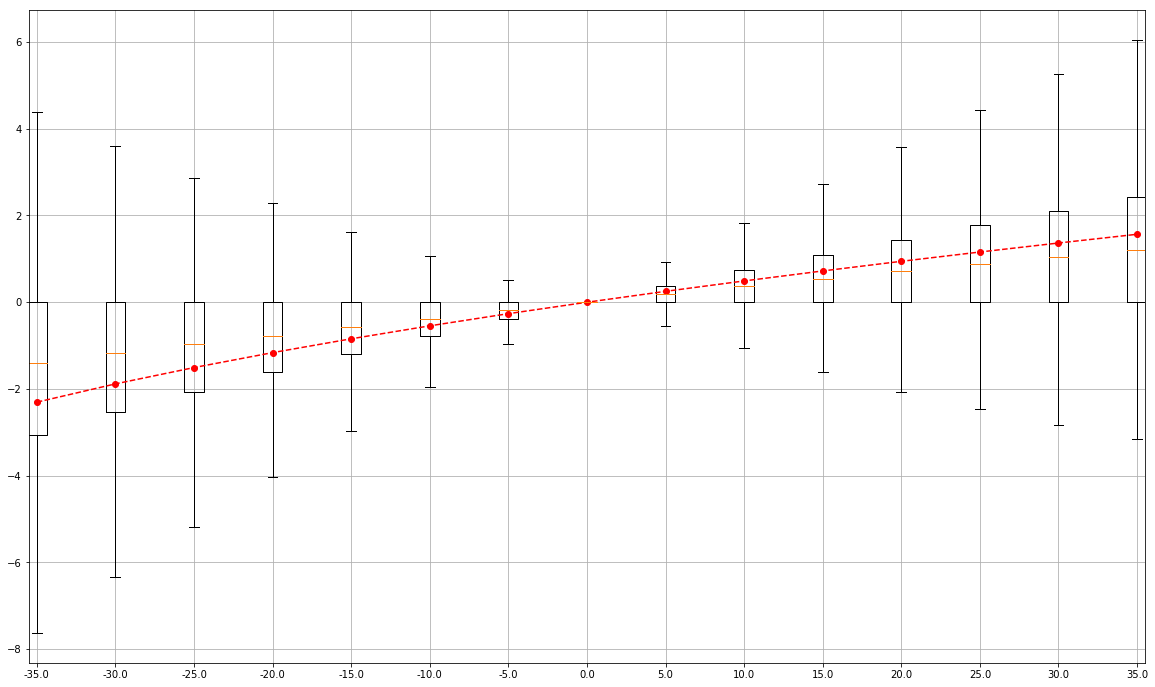

In [168]:
array_errors = np.load('./data/array_errors_sigma_HI.npy')
array_errors = np.array(np.transpose(array_errors)).reshape(10296,15)
mean_error_min  =  np.load('./data/mean_error_sigma_HI.npy')
plt.figure(figsize=[20,12])

plt.boxplot(array_errors,positions=np.array(np.arange(-35.,40.,5.)),showfliers=False, patch_artist =False, widths = 1.25) 
plt.plot(np.array(np.arange(-35.,40.,5.)),mean_error_min, 'o--', color='red')
plt.grid()

## Варьируем $\Sigma_s$

In [169]:
G = 4.32
step = 0
mean_error_min = []
std_error_min = []
array_errors = []

for percent in np.arange(-35.,40.,5.):
    
    Qeff_max_ = np.zeros(dist_kpc.shape)
    Qeff_min_ = np.zeros(dist_kpc.shape)
    Sigma_g = np.zeros(dist_kpc.shape)
    errors_min = np.zeros(dist_kpc.shape)
    errors_max = np.zeros(dist_kpc.shape)
    errors = []
    bugs = 0
    for i, row in enumerate(dist_kpc):
        for j, col in enumerate(dist_kpc[0]):
            step+=1
            if step % 1000 == 0:
                print(step)
            c = sigma_HI[i][j]/1000.
            Sigma_g[i][j] = 1.36*(Sigma_HI[i][j] + Sigma_H2[i][j])
            kappa = functions.epic_freq(velocity_approx, dist_kpc[i][j], dR)
            Sigma_s_ = (1 + percent/100.)*Sigma_s[i][j]
            s_R_max = sig_R_max[i][j]
            s_R_min = sig_R_min[i][j]
            Qg = kappa * c / (math.pi * G * Sigma_g[i][j])
            Qs_max = kappa * s_R_max / (3.36 * G * Sigma_s_)
            Qs_min = kappa * s_R_min / (3.36 * G * Sigma_s_)
        
       
            try:
                root,qeff = functions.FindMaxQeffKinem(rangek=np.arange(0.01, 50., 1.), Qs=Qs_min, Qg=Qg, s=c/s_R_min)
            except ValueError:
                bugs+=1
                qeff = 0.01
            Qeff_min_[i][j] = 1./qeff
                
                     
    for i, row in enumerate(dist_kpc):
        for j, col in enumerate(dist_kpc[0]):
            errors_min[i][j] = Qeff_min_[i][j]*100./Qeff_min[i][j] - 100
            errors.append(Qeff_min_[i][j]*100./Qeff_min[i][j] - 100)
            
    array_errors.append(errors)
    mean_error_min.append(errors_min.mean())
    std_error_min.append(errors_min.std())

    
np.save('./data/mean_error_Sigma_s.npy',mean_error_min)
np.save('./data/array_errors_Sigma_s.npy',array_errors)
np.save('./data/std_error_Sigma_s.npy',std_error_min)

1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000
87000
88000
89000
90000
91000
92000
93000
94000
95000
96000
97000
98000
99000
100000
101000
102000
103000
104000
105000
106000
107000
108000
109000
110000
111000
112000
113000
114000
115000
116000
117000
118000
119000
120000
121000
122000
123000
124000
125000
126000
127000
128000
129000
130000
131000
132000
133000
134000
135000
136000
137000
138000
139000
140000
141000
142000
143000
144000
145000
146000
147000
148000
149000
150000
151000
152000
153000
154000


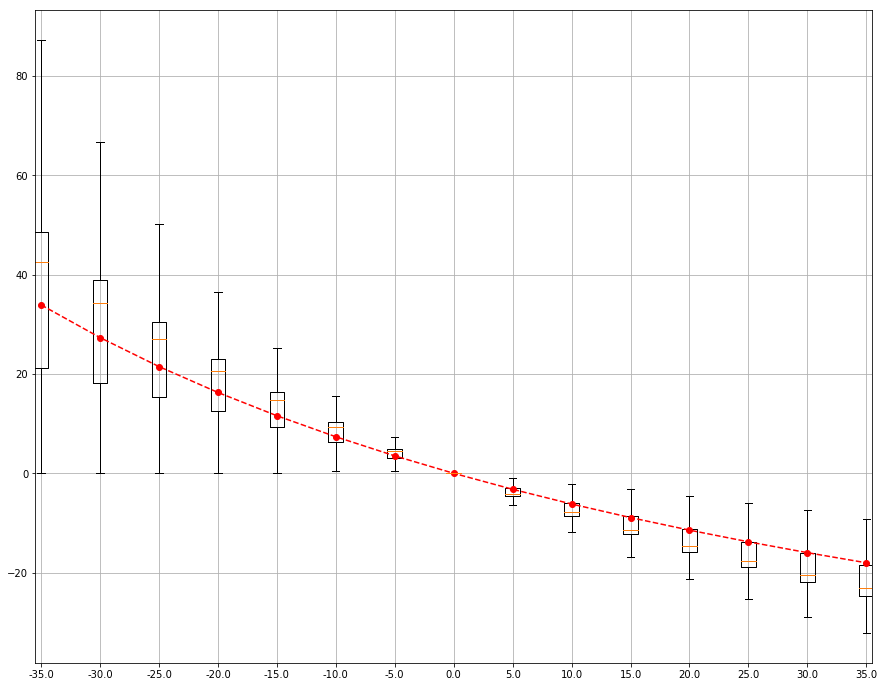

In [170]:
array_errors = np.load('./data/array_errors_Sigma_s.npy')
array_errors = np.array(np.transpose(array_errors)).reshape(10296,15)
mean_error_min  =  np.load('./data/mean_error_Sigma_s.npy')
plt.figure(figsize=[15,12])

plt.boxplot(array_errors,positions=np.array(np.arange(-35.,40.,5.)),showfliers=False, patch_artist =False, widths = 1.25) 
plt.plot(np.array(np.arange(-35.,40.,5.)),mean_error_min, 'o--', color='red')
plt.grid()

In [171]:
mean_error_Sigma_s = np.load('./data/mean_error_Sigma_s.npy')
mean_error_Sigma_HI = np.load('./data/mean_error_Sigma_HI.npy')
mean_error_sigma_s = np.load('./data/mean_error_sigma_s.npy')
mean_error_Sigma_H2 = np.load('./data/mean_error_Sigma_H2.npy')
mean_error_sigma_HI = np.load('./data/mean_error_sigma_HI.npy')

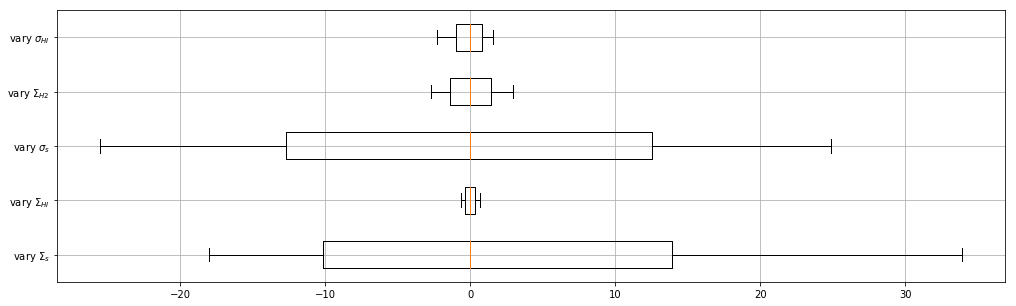

In [172]:
array = [mean_error_Sigma_s,mean_error_Sigma_HI,mean_error_sigma_s,mean_error_Sigma_H2,mean_error_sigma_HI]
plt.figure(figsize=[17,5])
plt.boxplot(array,showfliers=False, vert=False, labels=[r'vary $\Sigma_s$',r'vary $\Sigma_{HI}$',r'vary $\sigma_s$',
                                            r'vary $\Sigma_{H2}$', r'vary $\sigma_{HI}$'] )

plt.grid()

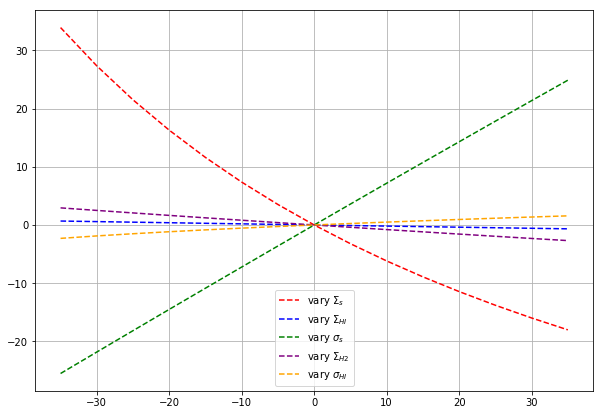

In [173]:
plt.figure(figsize=[10,7])
plt.plot(np.array(np.arange(-35.,40.,5.)),mean_error_Sigma_s, '--', label=r'vary $\Sigma_s$', color='red')
plt.plot(np.array(np.arange(-35.,40.,5.)),mean_error_Sigma_HI, '--', label=r'vary $\Sigma_{HI}$', color='blue')
plt.plot(np.array(np.arange(-35.,40.,5.)),mean_error_sigma_s, '--', label=r'vary $\sigma_s$', color='green')
plt.plot(np.array(np.arange(-35.,40.,5.)),mean_error_Sigma_H2, '--', label=r'vary $\Sigma_{H2}$', color='purple')
plt.plot(np.array(np.arange(-35.,40.,5.)),mean_error_sigma_HI, '--', label=r'vary $\sigma_{HI}$', color='orange')
plt.grid()
plt.legend()

## Проверим на чувствительность к ошибкам модель cold phase

In [9]:
from statistics import median
Sigma_s = np.load('./data/Sigma_s.npy')
Sigma_HI = np.load('./data/Sigma_HI.npy')
Sigma_H2 = np.load('./data/Sigma_H2.npy')
Sigma_SFR = np.load('./data/Sigma_SFR.npy')
dist_kpc = np.load('./data/dist_kpc.npy')
cold_phase = np.load('./data/cold_phase.npy')
H_alpha =np.load('./data/H_alpha.npy')

In [10]:
 Z = np.zeros(dist_kpc.shape)
for i, row in enumerate(H_alpha):
    for j, col in enumerate(H_alpha[0]):
        if (np.log10(H_alpha[i][j])<-14.47):
            Z[i][j] = 0.2
        if (-14.47 <= np.log10(H_alpha[i][j]) < -14.):
            Z[i][j] = 8.5    
        if (-14.<= np.log10(H_alpha[i][j]) < -13.7):
            Z[i][j] = 8.52
        if (-13.7 <= np.log10(H_alpha[i][j]) <-13.5):
            Z[i][j] = 8.55    
        if (-13.5 <= np.log10(H_alpha[i][j]) < -13.15):
            Z[i][j] = 8.58
        if (-13.15 <= np.log10(H_alpha[i][j])):
            Z[i][j] = 8.6 
                
Z[90:100,27:38] = 0.2  
Z[48:54,17:26] = 0.2 
Z[35:44,45:55] = 0.2 
Z[70:77, 0:7] = 0.2

#for i, row in enumerate(H_alpha):
  #  for j, col in enumerate(H_alpha[0]):
    #    if (Z[i][j]==0):
      #      Z[i][j] = NAN
            
np.save('./data/Z.npy',Z)            

In [11]:
Z_sun = 0.012

In [12]:
print(cold_phase.shape)

(156, 66)


### $\Sigma_{HI}$

In [19]:
G = 4.32
mean_error_cph = []
std_error_cph = []
array_errors = []
step = 0
for percent in np.arange(-35.,40.,5.):
    
   
    cold_phase_ = np.zeros(dist_kpc.shape) 
    errors_cph = np.zeros(dist_kpc.shape)
    errors = []
    for i, row in enumerate(dist_kpc):
        for j, col in enumerate(dist_kpc[0]):
            
            if (Z[i][j] != 0.):
                step+=1
                I = Sigma_SFR[i][j] * 5. * 10**10
                Sigma_HI_ = Sigma_HI[i][j]*(1. + percent/100.)
                Sigma_g = 1.36 * (Sigma_HI_+Sigma_H2[i][j])
                f = Sigma_g / (Sigma_g + Sigma_s[i][j])
                Sigma_SO = 6.1 * np.power(f, 0.3,dtype = np.float)  * np.power(I, 0.23,dtype = np.float)
                cold_phase_[i][j] = Sigma_SO / Sigma_g  * np.power(Z[i][j]/Z_sun/0.1, -0.3,dtype = np.float)
                    
   # cold_phase_ = np.nan_to_num(cold_phase_)
   # cold_phase = np.nan_to_num(cold_phase)
    for i, row in enumerate(dist_kpc):
        for j, col in enumerate(dist_kpc[0]):
             if (Z[i][j] != 0.):
                errors_cph[i][j] = cold_phase_[i][j]*100./cold_phase[i][j] - 100
                errors.append(cold_phase_[i][j]*100./cold_phase[i][j] - 100)
                
    errors_cph = np.nan_to_num(errors_cph)
    array_errors.append(np.nan_to_num(errors))
    mean_error_cph.append(np.median(errors_cph))
    std_error_cph.append(errors_cph.std())

print(step)    
np.save('./data/mean_error_Sigma_HI_cph.npy',mean_error_cph)
np.save('./data/array_errors_Sigma_HI_cph.npy',array_errors)
np.save('./data/std_error_Sigma_HI_cph.npy',std_error_cph)

/home/lera/.local/lib/python3.5/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in power


105360


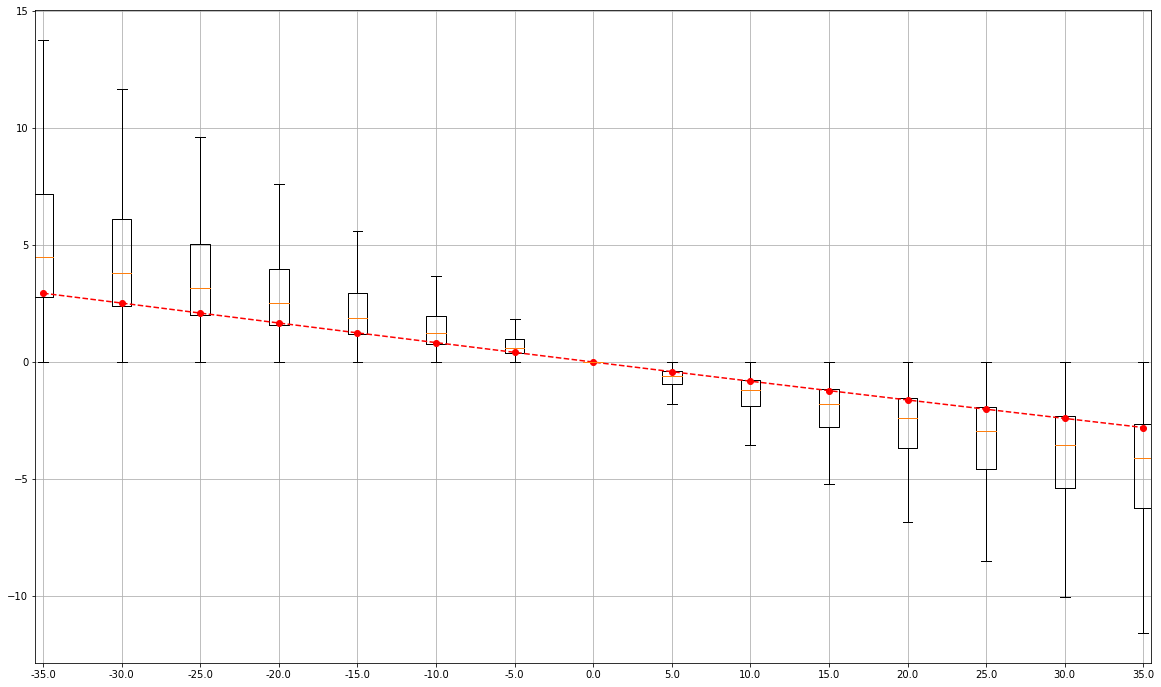

In [20]:
array_errors = np.load('./data/array_errors_Sigma_HI_cph.npy')
array_errors = np.array(np.transpose(array_errors)).reshape(7024,15)
mean_error_cph  =  np.load('./data/mean_error_Sigma_HI_cph.npy')
plt.figure(figsize=[20,12])

plt.boxplot(array_errors,positions=np.array(np.arange(-35.,40.,5.)),showfliers=False, patch_artist =False, widths = 1.25) 
plt.plot(np.array(np.arange(-35.,40.,5.)),mean_error_cph, 'o--', color='red')
plt.grid()

### $\Sigma_{H2}$

In [21]:
mean_error_cph = []
std_error_cph = []
array_errors = []
step = 0
for percent in np.arange(-35.,40.,5.):
    
   
    cold_phase_ = np.zeros(dist_kpc.shape) 
    errors_cph = np.zeros(dist_kpc.shape)
    errors = []
    for i, row in enumerate(dist_kpc):
        for j, col in enumerate(dist_kpc[0]):
            
            if (Z[i][j] != 0.):
                
                I = Sigma_SFR[i][j] * 5. * 10**10
                Sigma_H2_ = Sigma_H2[i][j]*(1. + percent/100.)
                Sigma_g = 1.36 * (Sigma_H2_+Sigma_HI[i][j])
                f = Sigma_g / (Sigma_g + Sigma_s[i][j])
                Sigma_SO = 6.1 * np.power(f, 0.3,dtype = np.float)  * np.power(I, 0.23,dtype = np.float)
                cold_phase_[i][j] = Sigma_SO / Sigma_g  * np.power(Z[i][j]/Z_sun/0.1, -0.3,dtype = np.float)
                    
   # cold_phase_ = np.nan_to_num(cold_phase_)
   # cold_phase = np.nan_to_num(cold_phase)
    for i, row in enumerate(dist_kpc):
        for j, col in enumerate(dist_kpc[0]):
             if (Z[i][j] != 0.):
                errors_cph[i][j] = cold_phase_[i][j]*100./cold_phase[i][j] - 100
                errors.append(cold_phase_[i][j]*100./cold_phase[i][j] - 100)
                
    errors_cph = np.nan_to_num(errors_cph)
    array_errors.append(np.nan_to_num(errors))
    mean_error_cph.append(np.median(errors_cph))
    std_error_cph.append(errors_cph.std())

    
np.save('./data/mean_error_Sigma_H2_cph.npy',mean_error_cph)
np.save('./data/array_errors_Sigma_H2_cph.npy',array_errors)
np.save('./data/std_error_Sigma_H2_cph.npy',std_error_cph)

/home/lera/.local/lib/python3.5/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in power


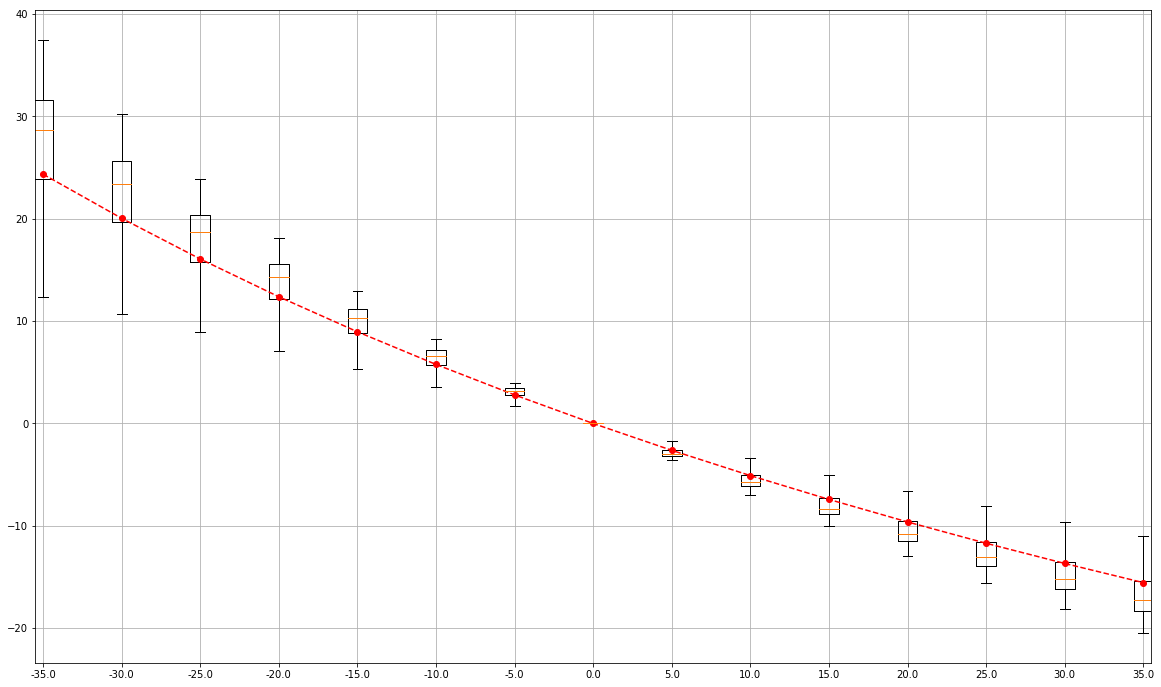

In [22]:
array_errors = np.load('./data/array_errors_Sigma_H2_cph.npy')
array_errors = np.array(np.transpose(array_errors)).reshape(7024,15)
mean_error_cph  =  np.load('./data/mean_error_Sigma_H2_cph.npy')
plt.figure(figsize=[20,12])

plt.boxplot(array_errors,positions=np.array(np.arange(-35.,40.,5.)),showfliers=False, patch_artist =False, widths = 1.25) 
plt.plot(np.array(np.arange(-35.,40.,5.)),mean_error_cph, 'o--', color='red')
plt.grid()

### $\Sigma_s$

In [23]:
mean_error_cph = []
std_error_cph = []
array_errors = []
step = 0
for percent in np.arange(-35.,40.,5.):
    
   
    cold_phase_ = np.zeros(dist_kpc.shape) 
    errors_cph = np.zeros(dist_kpc.shape)
    errors = []
    for i, row in enumerate(dist_kpc):
        for j, col in enumerate(dist_kpc[0]):
            
            if (Z[i][j] != 0.):
                
                I = Sigma_SFR[i][j] * 5. * 10**10
                Sigma_s_ = Sigma_s[i][j]*(1. + percent/100.)
                Sigma_g = 1.36 * (Sigma_H2[i][j] + Sigma_HI[i][j])
                f = Sigma_g / (Sigma_g + Sigma_s_)
                Sigma_SO = 6.1 * np.power(f, 0.3,dtype = np.float)  * np.power(I, 0.23,dtype = np.float)
                cold_phase_[i][j] = Sigma_SO / Sigma_g  * np.power(Z[i][j]/Z_sun/0.1, -0.3,dtype = np.float)
                    
   
    for i, row in enumerate(dist_kpc):
        for j, col in enumerate(dist_kpc[0]):
             if (Z[i][j] != 0.):
                errors_cph[i][j] = cold_phase_[i][j]*100./cold_phase[i][j] - 100
                errors.append(cold_phase_[i][j]*100./cold_phase[i][j] - 100)
                
    errors_cph = np.nan_to_num(errors_cph)
    array_errors.append(np.nan_to_num(errors))
    mean_error_cph.append(np.median(errors_cph))
    std_error_cph.append(errors_cph.std())

    
np.save('./data/mean_error_Sigma_s_cph.npy',mean_error_cph)
np.save('./data/array_errors_Sigma_s_cph.npy',array_errors)
np.save('./data/std_error_Sigma_s_cph.npy',std_error_cph)

/home/lera/.local/lib/python3.5/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in power


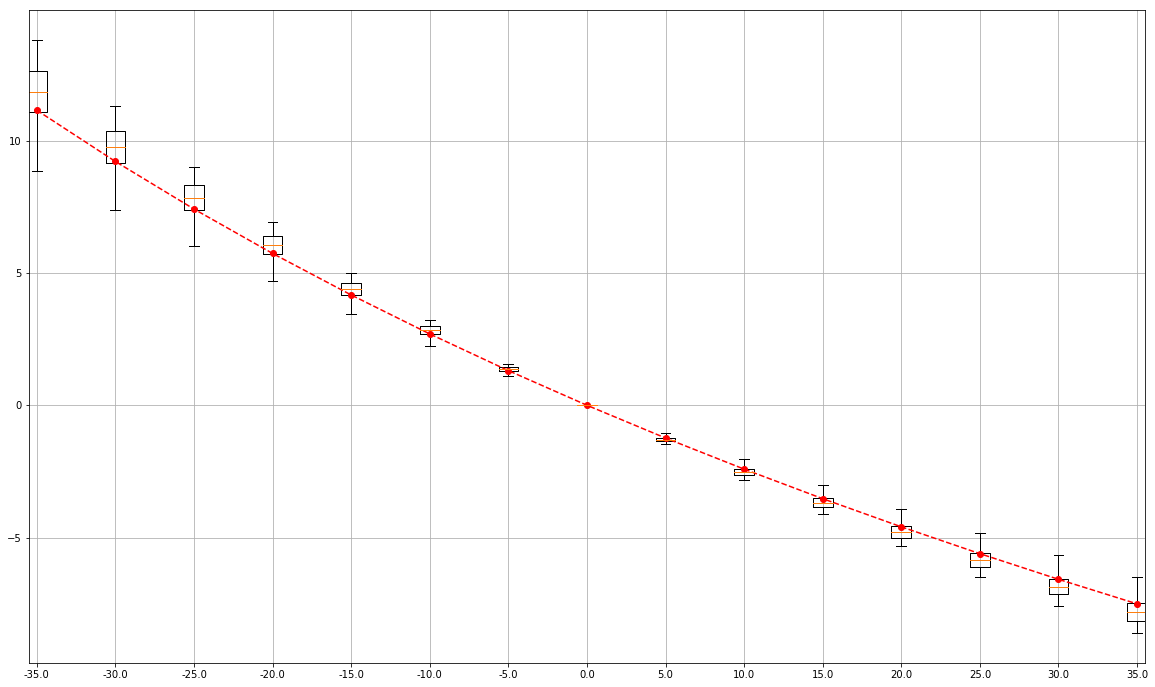

In [24]:
array_errors = np.load('./data/array_errors_Sigma_s_cph.npy')
array_errors = np.array(np.transpose(array_errors)).reshape(7024,15)
mean_error_cph  =  np.load('./data/mean_error_Sigma_s_cph.npy')
plt.figure(figsize=[20,12])

plt.boxplot(array_errors,positions=np.array(np.arange(-35.,40.,5.)),showfliers=False, patch_artist =False, widths = 1.25) 
plt.plot(np.array(np.arange(-35.,40.,5.)),mean_error_cph, 'o--', color='red')
plt.grid()

### $\Sigma_{SFR}$

In [25]:
mean_error_cph = []
std_error_cph = []
array_errors = []
step = 0
for percent in np.arange(-35.,40.,5.):
    
   
    cold_phase_ = np.zeros(dist_kpc.shape) 
    errors_cph = np.zeros(dist_kpc.shape)
    errors = []
    for i, row in enumerate(dist_kpc):
        for j, col in enumerate(dist_kpc[0]):
            
            if (Z[i][j] != 0.):
                
                Sigma_SFR_ = Sigma_SFR[i][j]*(1. + percent/100.)
                I = Sigma_SFR_ * 5. * 10**10                
                Sigma_g = 1.36 * (Sigma_H2[i][j] + Sigma_HI[i][j])
                f = Sigma_g / (Sigma_g + Sigma_s[i][j])
                Sigma_SO = 6.1 * np.power(f, 0.3,dtype = np.float)  * np.power(I, 0.23,dtype = np.float)
                cold_phase_[i][j] = Sigma_SO / Sigma_g  * np.power(Z[i][j]/Z_sun/0.1, -0.3,dtype = np.float)
                    
   
    for i, row in enumerate(dist_kpc):
        for j, col in enumerate(dist_kpc[0]):
             if (Z[i][j] != 0.):
                errors_cph[i][j] = cold_phase_[i][j]*100./cold_phase[i][j] - 100
                errors.append(cold_phase_[i][j]*100./cold_phase[i][j] - 100)
                
    errors_cph = np.nan_to_num(errors_cph)
    array_errors.append(np.nan_to_num(errors))
    mean_error_cph.append(np.median(errors_cph))
    std_error_cph.append(errors_cph.std())

    
np.save('./data/mean_error_Sigma_SFR_cph.npy',mean_error_cph)
np.save('./data/array_errors_Sigma_SFR_cph.npy',array_errors)
np.save('./data/std_error_Sigma_SFR_cph.npy',std_error_cph)

/home/lera/.local/lib/python3.5/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in power


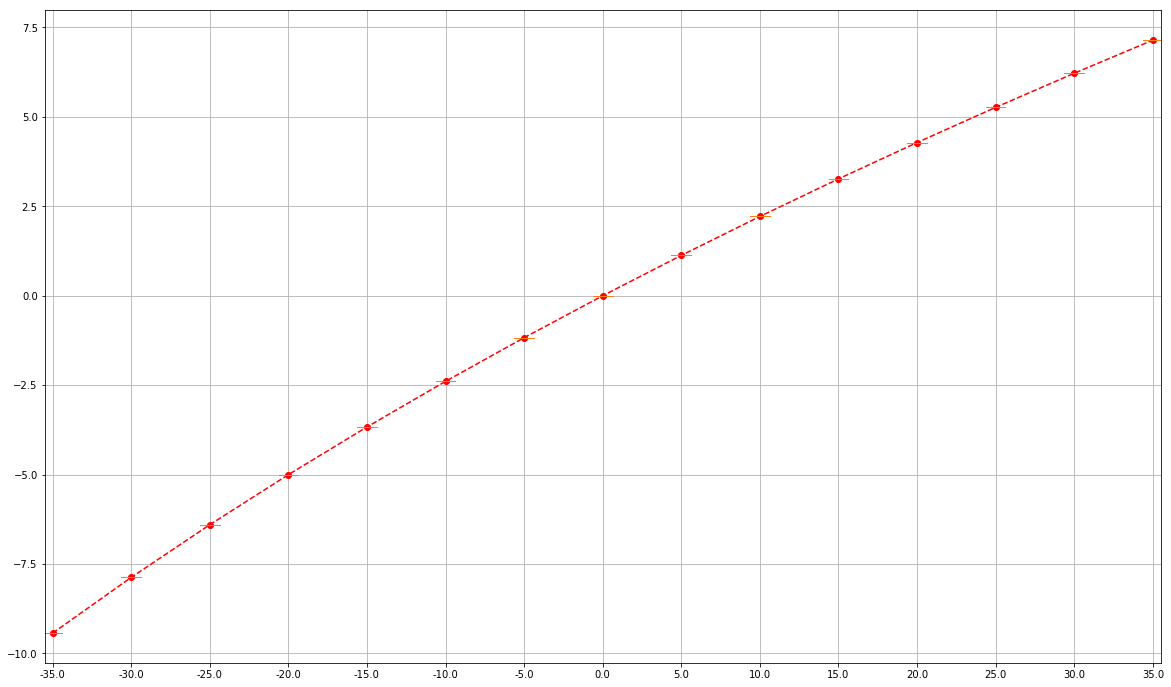

In [26]:
array_errors = np.load('./data/array_errors_Sigma_SFR_cph.npy')
array_errors = np.array(np.transpose(array_errors)).reshape(7024,15)
mean_error_cph  =  np.load('./data/mean_error_Sigma_SFR_cph.npy')
plt.figure(figsize=[20,12])

plt.boxplot(array_errors,positions=np.array(np.arange(-35.,40.,5.)),showfliers=False, patch_artist =False, widths = 1.25) 
plt.plot(np.array(np.arange(-35.,40.,5.)),mean_error_cph, 'o--', color='red')
plt.grid()

### metallicity

In [27]:
mean_error_cph = []
std_error_cph = []
array_errors = []
step = 0
for percent in np.arange(-35.,40.,5.):
    
   
    cold_phase_ = np.zeros(dist_kpc.shape) 
    errors_cph = np.zeros(dist_kpc.shape)
    errors = []
    for i, row in enumerate(dist_kpc):
        for j, col in enumerate(dist_kpc[0]):
            
            if (Z[i][j] != 0.):
                
                Z_ = Z[i][j]*(1. + percent/100.)
                I = Sigma_SFR[i][j] * 5. * 10**10                
                Sigma_g = 1.36 * (Sigma_H2[i][j] + Sigma_HI[i][j])
                f = Sigma_g / (Sigma_g + Sigma_s[i][j])
                Sigma_SO = 6.1 * np.power(f, 0.3,dtype = np.float)  * np.power(I, 0.23,dtype = np.float)
                cold_phase_[i][j] = Sigma_SO / Sigma_g  * np.power(Z_/Z_sun/0.1, -0.3,dtype = np.float)
                    
   
    for i, row in enumerate(dist_kpc):
        for j, col in enumerate(dist_kpc[0]):
             if (Z[i][j] != 0.):
                errors_cph[i][j] = cold_phase_[i][j]*100./cold_phase[i][j] - 100
                errors.append(cold_phase_[i][j]*100./cold_phase[i][j] - 100)
                
    errors_cph = np.nan_to_num(errors_cph)
    array_errors.append(np.nan_to_num(errors))
    mean_error_cph.append(np.median(errors_cph))
    std_error_cph.append(errors_cph.std())

    
np.save('./data/mean_error_Z_cph.npy',mean_error_cph)
np.save('./data/array_errors_Z_cph.npy',array_errors)
np.save('./data/std_error_Z_cph.npy',std_error_cph)

/home/lera/.local/lib/python3.5/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in power


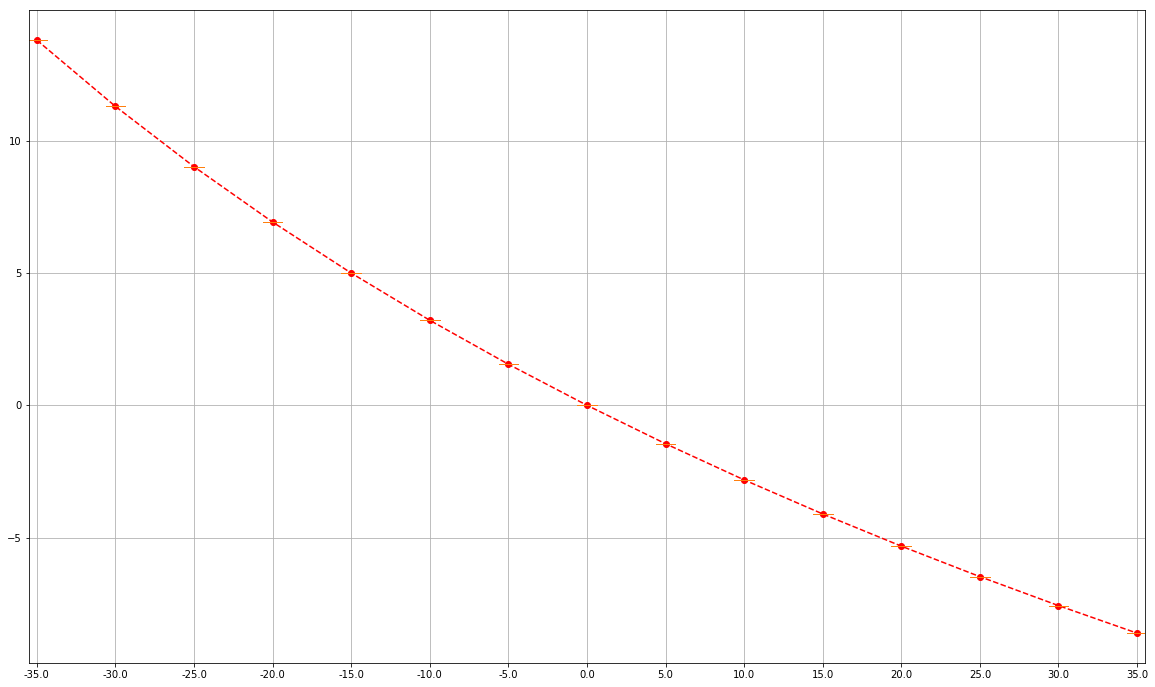

In [28]:
array_errors = np.load('./data/array_errors_Z_cph.npy')
array_errors = np.array(np.transpose(array_errors)).reshape(7024,15)
mean_error_cph  =  np.load('./data/mean_error_Z_cph.npy')
plt.figure(figsize=[20,12])

plt.boxplot(array_errors,positions=np.array(np.arange(-35.,40.,5.)),showfliers=False, patch_artist =False, widths = 1.25) 
plt.plot(np.array(np.arange(-35.,40.,5.)),mean_error_cph, 'o--', color='red')
plt.grid()

In [4]:
mean_error_Sigma_s = np.load('./data/mean_error_Sigma_s_cph.npy')
mean_error_Sigma_HI = np.load('./data/mean_error_Sigma_HI_cph.npy')
mean_error_Z = np.load('./data/mean_error_Z_cph.npy')
mean_error_Sigma_H2 = np.load('./data/mean_error_Sigma_H2_cph.npy')
mean_error_Sigma_SFR = np.load('./data/mean_error_Sigma_SFR_cph.npy')

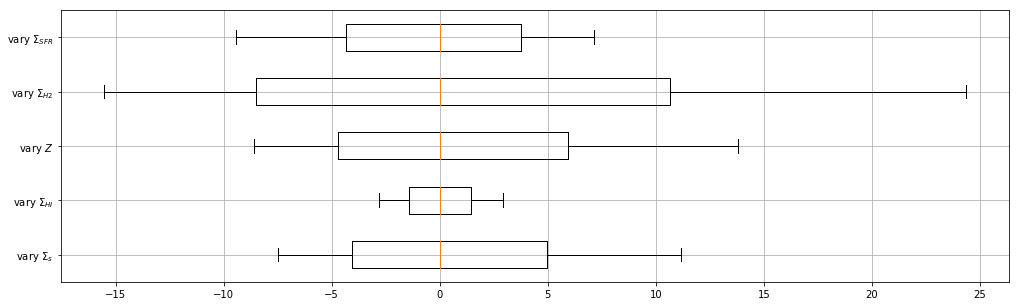

In [5]:
array = [mean_error_Sigma_s,mean_error_Sigma_HI,mean_error_Z,mean_error_Sigma_H2,mean_error_Sigma_SFR]
plt.figure(figsize=[17,5])
plt.boxplot(array,showfliers=False, vert=False, labels=[r'vary $\Sigma_s$',r'vary $\Sigma_{HI}$',r'vary $Z$',
                                            r'vary $\Sigma_{H2}$', r'vary $\Sigma_{SFR}$'] )

plt.grid()

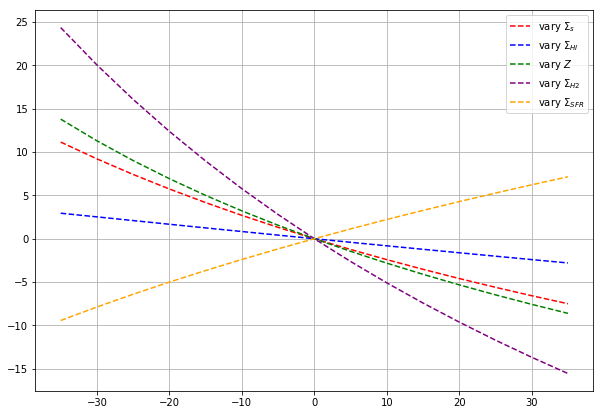

In [6]:
plt.figure(figsize=[10,7])
plt.plot(np.array(np.arange(-35.,40.,5.)),mean_error_Sigma_s, '--', label=r'vary $\Sigma_s$', color='red')
plt.plot(np.array(np.arange(-35.,40.,5.)),mean_error_Sigma_HI, '--', label=r'vary $\Sigma_{HI}$', color='blue')
plt.plot(np.array(np.arange(-35.,40.,5.)),mean_error_Z, '--', label=r'vary $Z$', color='green')
plt.plot(np.array(np.arange(-35.,40.,5.)),mean_error_Sigma_H2, '--', label=r'vary $\Sigma_{H2}$', color='purple')
plt.plot(np.array(np.arange(-35.,40.,5.)),mean_error_Sigma_SFR, '--', label=r'vary $\Sigma_{SFR}$', color='orange')
plt.grid()
plt.legend()